In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('export_GeneracionMedidaBiogas_2025-04-15_11_51.csv', sep=';')
df

,id,name,geoid,geoname,value,datetime
0,1169,Generación medida Biogás,NaN,NaN,1867.585,2015-01-01T00:00:00+01:00
1,1169,Generación medida Biogás,NaN,NaN,1934.112,2015-01-02T00:00:00+01:00
2,1169,Generación medida Biogás,NaN,NaN,1900.001,2015-01-03T00:00:00+01:00
3,1169,Generación medida Biogás,NaN,NaN,1880.941,2015-01-04T00:00:00+01:00
4,1169,Generación medida Biogás,NaN,NaN,1970.059,2015-01-05T00:00:00+01:00
...,...,...,...,...,...,...
3707,1169,Generación medida Biogás,NaN,NaN,1698.627,2025-02-24T00:00:00+01:00
3708,1169,Generación medida Biogás,NaN,NaN,1783.310,2025-02-25T00:00:00+01:00
3709,1169,Generación medida Biogás,NaN,NaN,1827.765,2025-02-26T00:00:00+01:00
3710,1169,Generación medida Biogás,NaN,NaN,1875.433,2025-02-27T00:00:00+01:00


In [9]:
print(df.columns)

Index(['id', 'name', 'geoid', 'geoname', 'value', 'datetime'], dtype='object')


# EDA

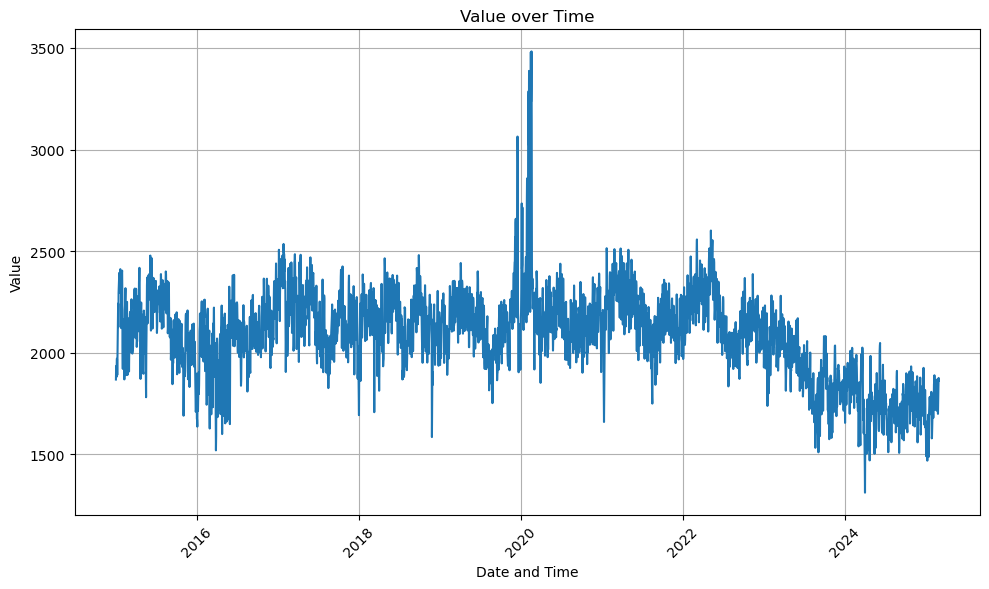

In [12]:

# Convert the datetime column to datetime objects
df['datetime'] = pd.to_datetime(df['datetime'], utc=True)

plt.figure(figsize=(10, 6))  
plt.plot(df['datetime'], df['value'])

plt.xlabel('Date and Time')
plt.ylabel('Value')
plt.title('Value over Time')
plt.grid(True)
plt.xticks(rotation=45) 

plt.tight_layout()  
plt.show()


In [13]:
# Análisis estadístico
print("Estadísticas básicas del dataset:")
print(df['value'].describe())

Estadísticas básicas del dataset:
count    3712.000000
mean     2091.255825
std       216.375911
min      1310.695000
25%      1971.166250
50%      2113.275500
75%      2234.859000
max      3483.021000
Name: value, dtype: float64


In [14]:
# Análisis de valores nulos
print("\nValores nulos:")
print(df.isnull().sum())


Valores nulos:
id             0
name           0
geoid       3712
geoname     3712
value          0
datetime       0
dtype: int64


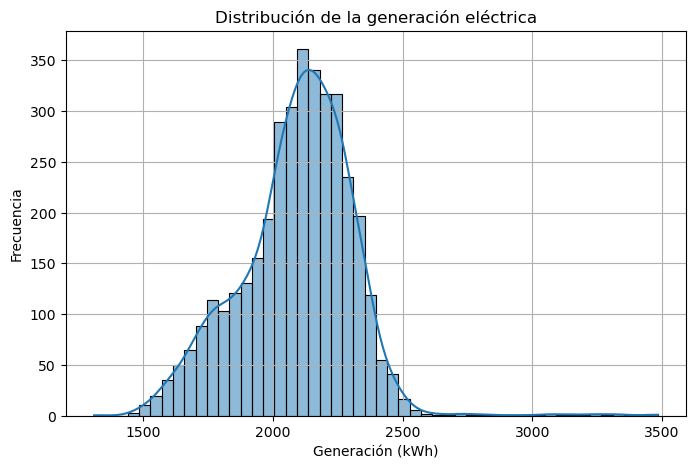

In [15]:
import seaborn as sns
# Distribución de los valores
plt.figure(figsize=(8,5))
sns.histplot(df['value'], bins=50, kde=True)
plt.title('Distribución de la generación eléctrica')
plt.xlabel('Generación (kWh)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


In [17]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

df['año'] = df.index.year
df['mes'] = df.index.month
df_mensual = df.groupby(['año', 'mes'])['value'].sum().reset_index()


In [19]:
df['dia_semana'] = df.index.strftime('%a') 

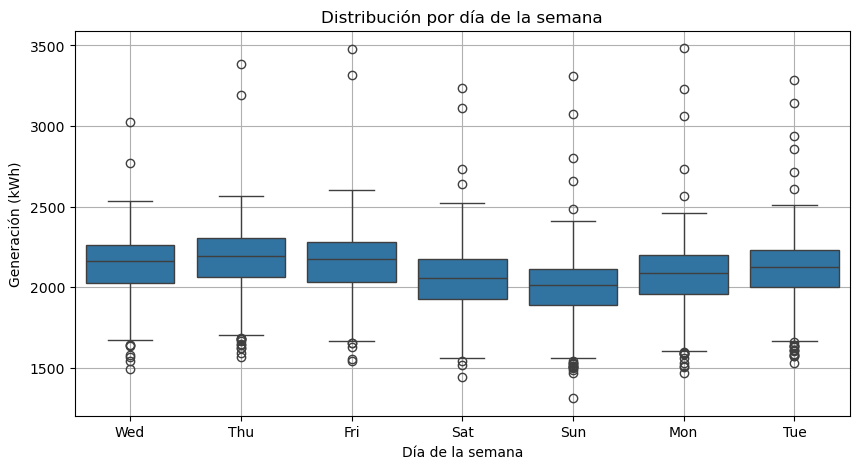

In [22]:
# Boxplot por día de la semana
plt.figure(figsize=(10,5))
sns.boxplot(x='dia_semana', y='value', data=df)
plt.title('Distribución por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Generación (kWh)')
plt.grid(True)
plt.show()

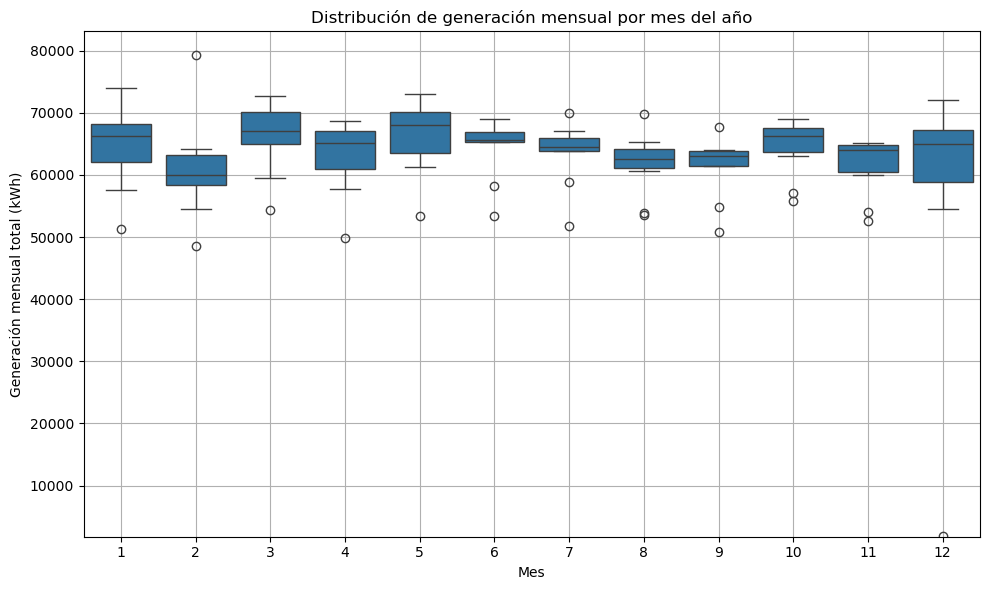

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(x='mes', y='value', data=df_mensual)
plt.title('Distribución de generación mensual por mes del año')
plt.xlabel('Mes')
plt.ylabel('Generación mensual total (kWh)')
plt.grid(True)
plt.ylim(bottom=df_mensual['value'].min() * 0.95)  
plt.tight_layout()
plt.show()


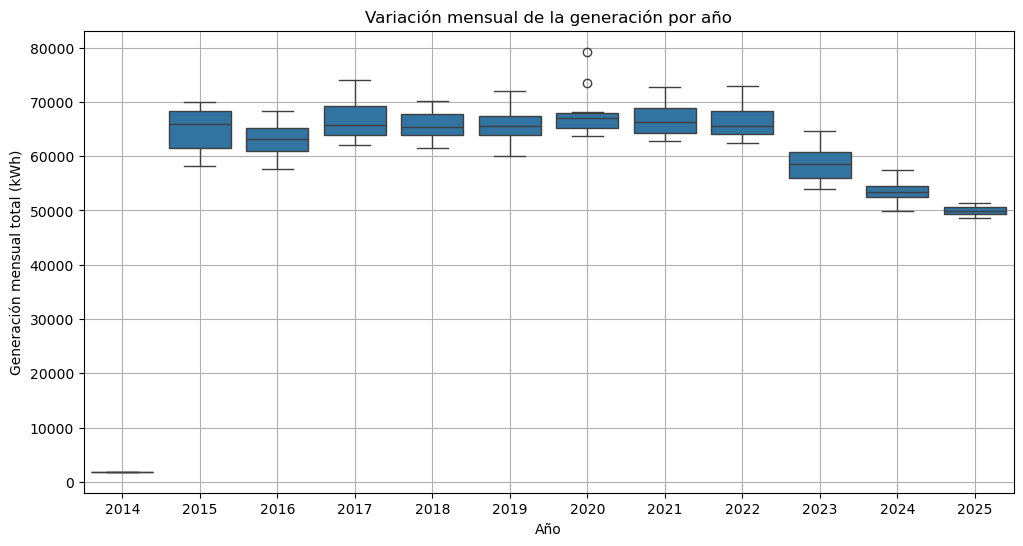

In [25]:
plt.figure(figsize=(12,6))
sns.boxplot(x='año', y='value', data=df_mensual)
plt.title('Variación mensual de la generación por año')
plt.xlabel('Año')
plt.ylabel('Generación mensual total (kWh)')
plt.grid(True)
plt.show()


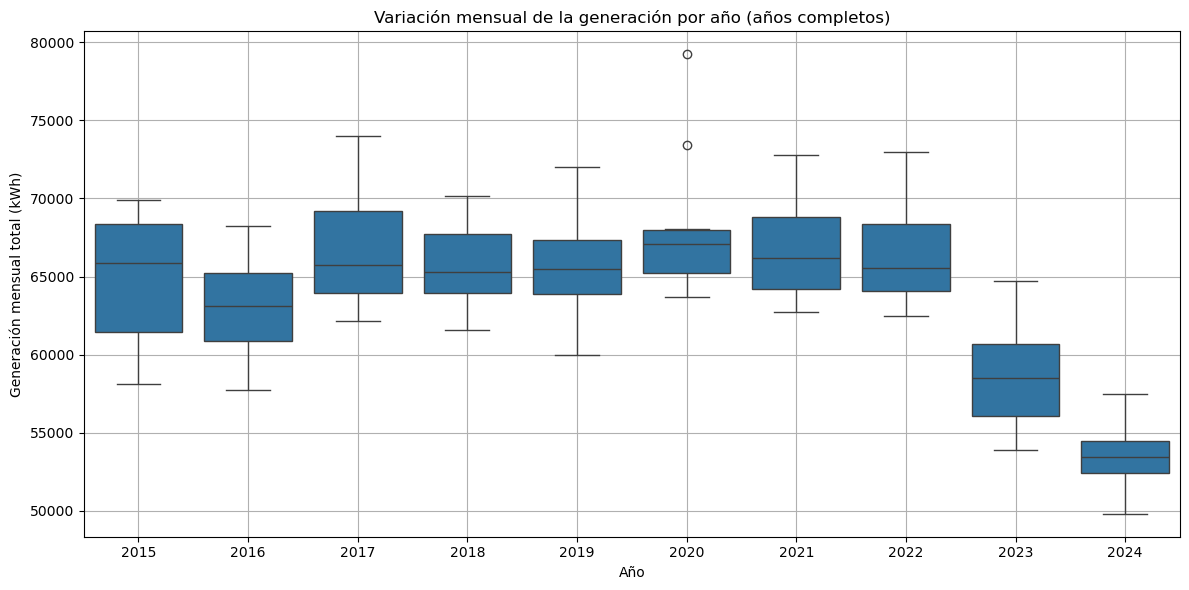

In [28]:
# cuántos meses hay por año
conteo_meses = df_mensual.groupby('año')['mes'].nunique()

# Filtrar solo años con 12 meses
años_completos = conteo_meses[conteo_meses == 12].index
df_mensual_filtrado = df_mensual[df_mensual['año'].isin(años_completos)]

# Boxplot solo con años completos
plt.figure(figsize=(12,6))
sns.boxplot(x='año', y='value', data=df_mensual_filtrado)
plt.title('Variación mensual de la generación por año (años completos)')
plt.xlabel('Año')
plt.ylabel('Generación mensual total (kWh)')
plt.grid(True)
plt.tight_layout()
plt.show()


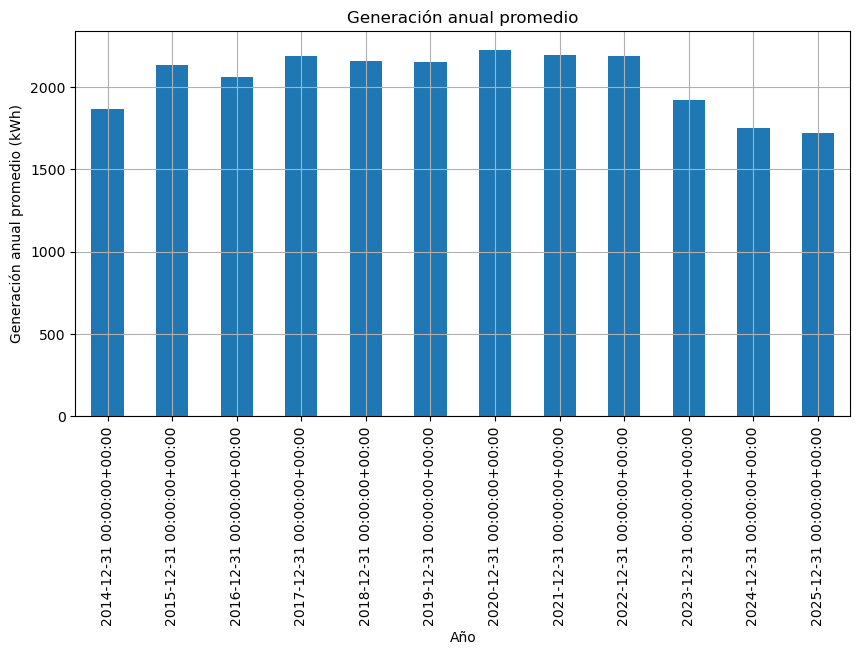

In [31]:
# Anual
plt.figure(figsize=(10,5))
df.resample('YE')['value'].mean().plot(kind='bar')
plt.title('Generación anual promedio')
plt.xlabel('Año')
plt.ylabel('Generación anual promedio (kWh)')
plt.grid(True)
plt.show()

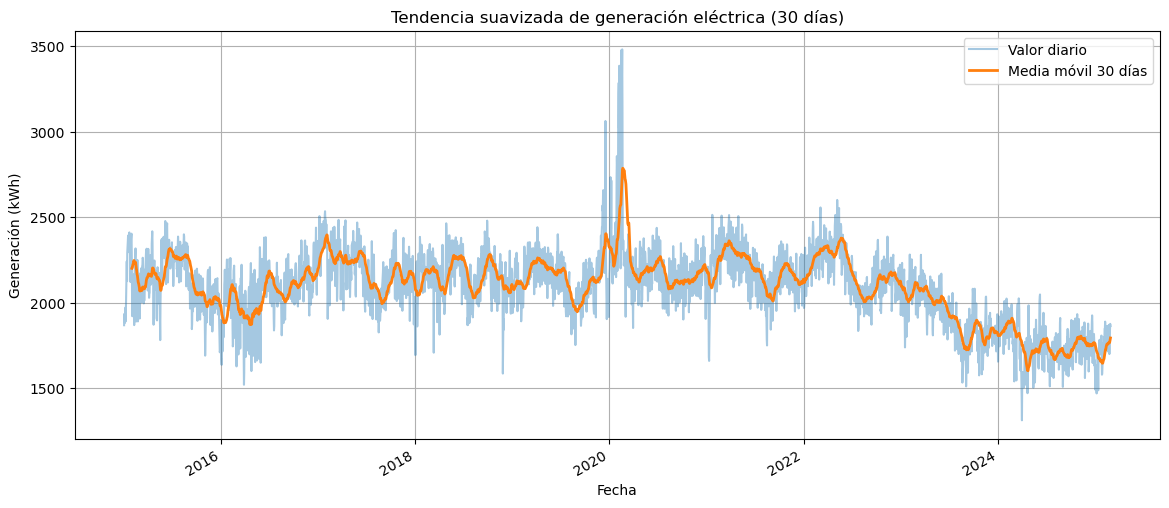

In [33]:
# Media de 30 días
df['rolling_30d'] = df['value'].rolling(window=30).mean()

plt.figure(figsize=(14,6))
df['value'].plot(alpha=0.4, label='Valor diario')
df['rolling_30d'].plot(label='Media móvil 30 días', linewidth=2)
plt.title('Tendencia suavizada de generación eléctrica (30 días)')
plt.xlabel('Fecha')
plt.ylabel('Generación (kWh)')
plt.legend()
plt.grid(True)
plt.show()


* tendencia descendente desde 2021 hasta 2025.

* Picos alrededor de 2020

* La línea naranja suaviza la variabilidad diaria y muestra la tendencia global de largo plazo.

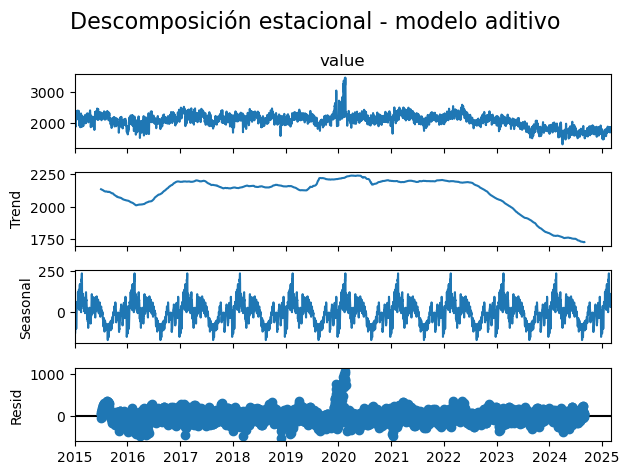

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['value'], model='additive', period=365)
result.plot()
plt.suptitle('Descomposición estacional - modelo aditivo' , fontsize=16)
plt.tight_layout()
plt.show()


| Componente   | Significado             | Observación                                                                 |
| ------------ | ----------------------- | --------------------------------------------------------------------------- |
| **Value**    | Serie original          | Se observan las mismas oscilaciones y el pico anómalo de 2020.              |
| **Trend**    | Tendencia a largo plazo | Crecimiento leve hasta 2021 y caída sostenida desde entonces.               |
| **Seasonal** | Componente estacional   | Se repite de forma casi idéntica cada año → clara **estacionalidad anual**. |
| **Resid**    | Ruido / Irregularidades | Alta variabilidad en torno a 2020 → posible anomalía operativa o externa.   |


* Ciclos claros: Lo estacional es muy marcado. Cada año se repiten los mismos patrones de subidas y bajadas → altamente predecible.

* Tendencia negativa: La producción va decreciendo desde ~2021. Esto puede deberse a desgaste de infraestructuras, cambios operativos o menor disponibilidad de insumos.

* Anomalías claras (2020): En la tendencia, residuo y gráfico original: evento muy marcado

In [44]:
from scipy.stats import zscore

df['z_score'] = zscore(df['value'])
outliers_z = df[abs(df['z_score']) > 3]

print(f"Número de outliers con Z-score > 3: {len(outliers_z)}")


Número de outliers con Z-score > 3: 19


- Z-score mide cuántas desviaciones estándar se aleja un valor del promedio.

- Un Z-score > 3 (o < -3) implica que ese valor es extremadamente raro en una distribución normal
  
-**19 outliers detectados bajo esta lógica → son valores muy extremos y estadísticamente inusuales**

In [46]:
Q1 = df['value'].quantile(0.25)
Q3 = df['value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df[(df['value'] < lower_bound) | (df['value'] > upper_bound)]
print(f"Número de outliers por IQR: {len(outliers_iqr)}")


Número de outliers por IQR: 59


59 outliers identificados → método más sensible que Z-score porque no asume distribución normal.


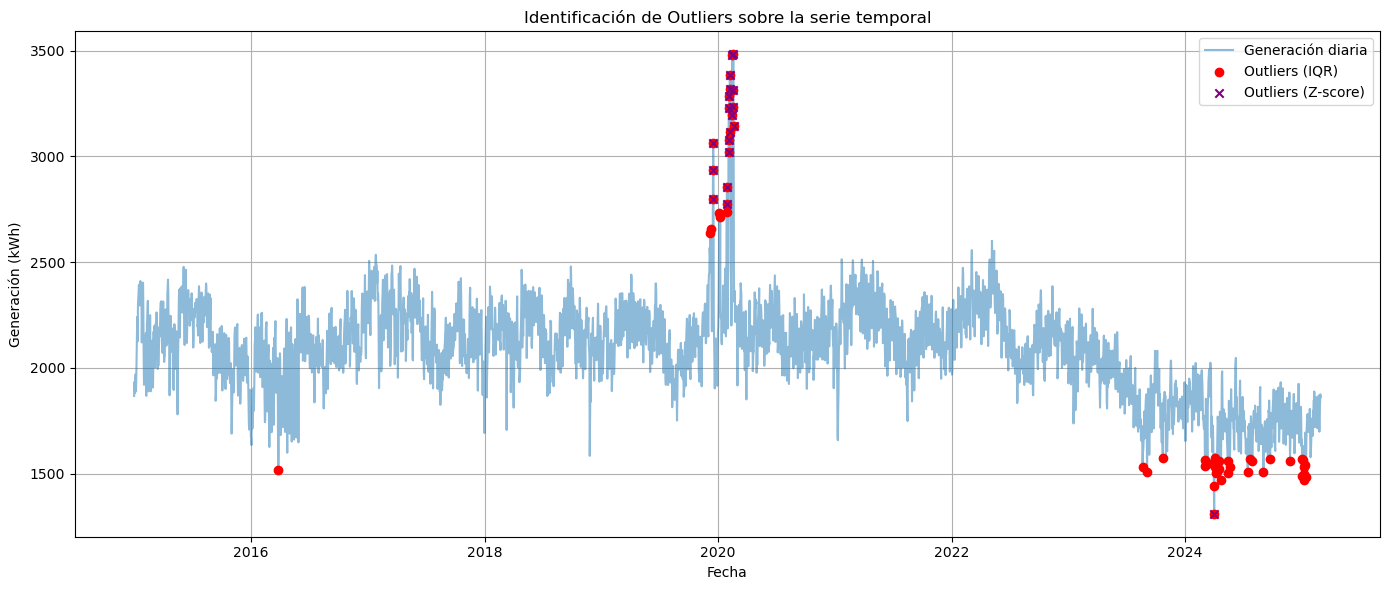

In [51]:
plt.figure(figsize=(14, 6))

# Línea de la serie original
plt.plot(df.index, df['value'], label='Generación diaria', alpha=0.5)

# Outliers por IQR en rojo
plt.scatter(outliers_iqr.index, outliers_iqr['value'], color='red', label='Outliers (IQR)', zorder=5)

# Outliers por Z-score en violeta
plt.scatter(outliers_z.index, outliers_z['value'], color='purple', label='Outliers (Z-score)', marker='x', zorder=5)

plt.title('Identificación de Outliers sobre la serie temporal')
plt.xlabel('Fecha')
plt.ylabel('Generación (kWh)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


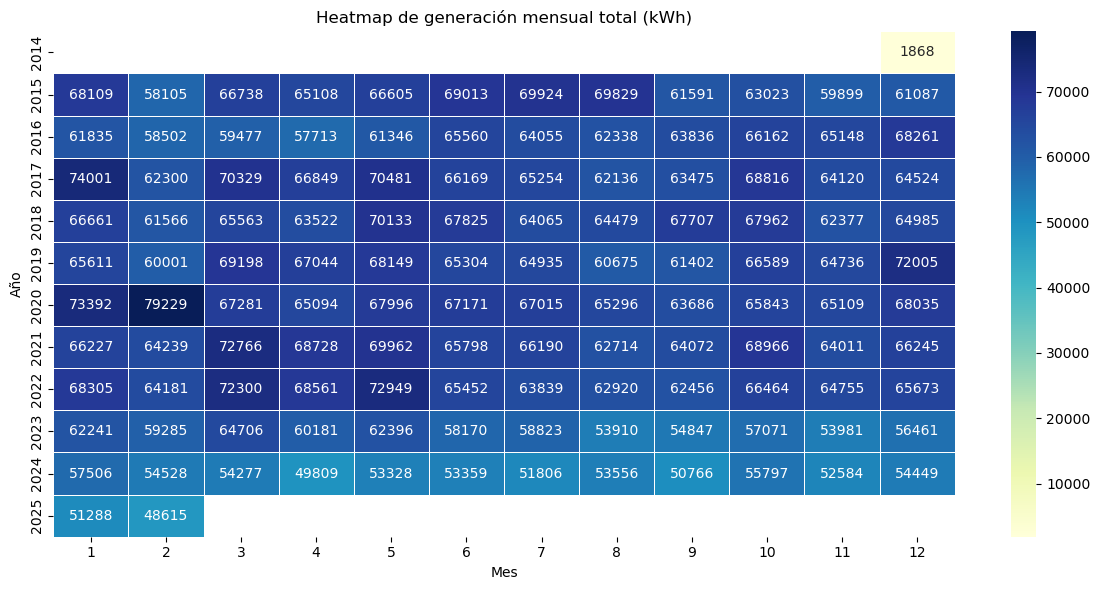

In [53]:
df['año'] = df.index.year
df['mes'] = df.index.month

pivot_table = df.groupby(['año', 'mes'])['value'].sum().unstack()

# heatmap
plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmap de generación mensual total (kWh)')
plt.xlabel('Mes')
plt.ylabel('Año')
plt.tight_layout()
plt.show()


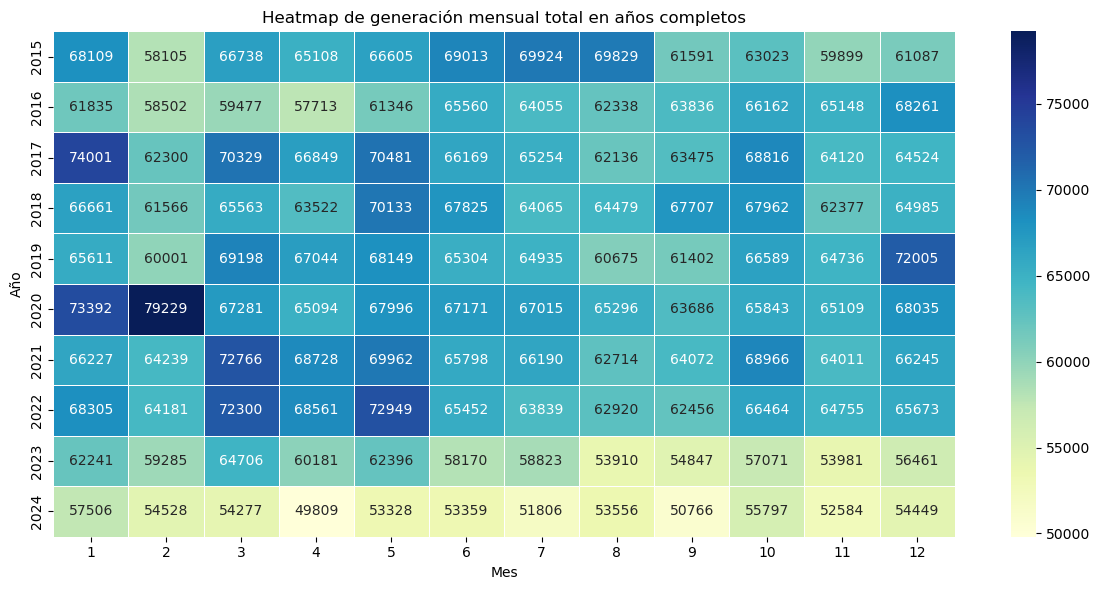

In [1053]:
heatmap_data = df_mensual_filtrado.pivot(index='año', columns='mes', values='value')

# Generar el heatmap de años completos
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmap de generación mensual total en años completos')
plt.xlabel('Mes')
plt.ylabel('Año')
plt.tight_layout()
plt.show()


In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM, GRU, Bidirectional
import yfinance as yf

# MODELO NAIVE

In [1030]:
from sklearn.preprocessing import MinMaxScaler

# Función de generación de secuencias
def create_lstm_dataset(series, window_size, step_ahead):
    X, y = [], []
    for i in range(len(series) - window_size - step_ahead + 1):
        X.append(series[i:i + window_size])
        y.append(series[i + window_size:i + window_size + step_ahead])
    return np.array(X), np.array(y)

# --- Preparar datos ---
series = df['value'].values

# Parámetros de la serie temporal
window_size = 21     # días de entrada,probar más combinaciones
step_ahead = 1       # predicción 1 día adelante 

# Crear X e y
X, y = create_lstm_dataset(series, window_size, step_ahead)

# División train/test 
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Escalado
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
y_train_scaled = scaler_y.fit_transform(y_train)

X_test_scaled = scaler_X.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)
y_test_scaled = scaler_y.transform(y_test)

# Redimensionar para LSTM
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

print(f"X_train shape: {X_train_scaled.shape}")
print(f"y_train shape: {y_train_scaled.shape}")
print(f"X_test shape: {X_test_scaled.shape}")
print(f"y_test shape: {y_test_scaled.shape}")


X_train shape: (2952, 21, 1)
y_train shape: (2952, 1)
X_test shape: (739, 21, 1)
y_test shape: (739, 1)


In [1032]:
# Define the split point
split_index = int(len(X) * 0.8)  # 80% for training, 20% for testing

# Split the data manually
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]
X_train

array([[1867.585, 1934.112, 1900.001, ..., 2295.316, 2408.968, 2410.99 ],
       [1934.112, 1900.001, 1880.941, ..., 2408.968, 2410.99 , 2400.788],
       [1900.001, 1880.941, 1970.059, ..., 2410.99 , 2400.788, 2306.426],
       ...,
       [2105.052, 2070.185, 1888.546, ..., 2028.332, 2041.753, 2125.324],
       [2070.185, 1888.546, 1964.12 , ..., 2041.753, 2125.324, 2191.397],
       [1888.546, 1964.12 , 2084.398, ..., 2125.324, 2191.397, 2130.1  ]])

In [1034]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mae, rmse, mape

In [1036]:
y_pred_naive = y_test[:-1] # y_pred de t = y_{t-1}
y_true_naive = y_test[1:] # verdad de t = y_t

# Evaluación solo sobre los valores alineados. 
print("Naive Model - MAE, RMSE, MAPE:", evaluate(y_true_naive, y_pred_naive))

Naive Model - MAE, RMSE, MAPE: (66.30500135501354, 82.5123210239876, 3.7178039764846966)


# RNN SIMPLE

In [193]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
# --- Función de generación de secuencias ---
def create_lstm_dataset(series, window_size, step_ahead):
    X, y = [], []
    for i in range(len(series) - window_size - step_ahead + 1):
        X.append(series[i:i + window_size])
        y.append(series[i + window_size:i + window_size + step_ahead])
    return np.array(X), np.array(y)

# --- Preparar datos ---
series = df['value'].values

# Parámetros de la serie temporal
window_size = 14     # días de entrada 
step_ahead = 1       # predicción 1 día adelante u

# Crear X e y
X, y = create_lstm_dataset(series, window_size, step_ahead)

# División train/test 
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Escalado
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
y_train_scaled = scaler_y.fit_transform(y_train)

X_test_scaled = scaler_X.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)
y_test_scaled = scaler_y.transform(y_test)

# Redimensionar para LSTM
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

print(f"X_train shape: {X_train_scaled.shape}")
print(f"y_train shape: {y_train_scaled.shape}")
print(f"X_test shape: {X_test_scaled.shape}")
print(f"y_test shape: {y_test_scaled.shape}")


X_train shape: (2958, 14, 1)
y_train shape: (2958, 1)
X_test shape: (740, 14, 1)
y_test shape: (740, 1)


In [195]:
# Define the split point
split_index = int(len(X) * 0.8)  # 80% for training, 20% for testing

# Split the data manually
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]
X_train

array([[1867.585, 1934.112, 1900.001, ..., 2125.626, 2293.995, 2321.617],
       [1934.112, 1900.001, 1880.941, ..., 2293.995, 2321.617, 2356.918],
       [1900.001, 1880.941, 1970.059, ..., 2321.617, 2356.918, 2392.773],
       ...,
       [2196.055, 2281.408, 2199.859, ..., 2113.288, 2028.332, 2041.753],
       [2281.408, 2199.859, 2039.861, ..., 2028.332, 2041.753, 2125.324],
       [2199.859, 2039.861, 2139.878, ..., 2041.753, 2125.324, 2191.397]])

In [197]:
# Initialize scalers
scaler_X = MinMaxScaler(feature_range=(0, 1))  # For input data 
scaler_y = MinMaxScaler(feature_range=(0, 1))  # For output data

# Fit the scaler on the training data and transform
X_train_scaled = scaler_X.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
y_train_scaled = scaler_y.fit_transform(y_train)

# Transform the test data using the same scalers
X_test_scaled = scaler_X.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)
y_test_scaled = scaler_y.transform(y_test)
X_train_scaled

array([[0.17751427, 0.21138593, 0.1940186 , ..., 0.30889369, 0.39461735,
        0.40868086],
       [0.21138593, 0.1940186 , 0.18431436, ..., 0.39461735, 0.40868086,
        0.42665407],
       [0.1940186 , 0.18431436, 0.22968805, ..., 0.40868086, 0.42665407,
        0.44490935],
       ...,
       [0.34475202, 0.38820879, 0.3466888 , ..., 0.3026119 , 0.25935726,
        0.26619045],
       [0.38820879, 0.3466888 , 0.26522715, ..., 0.25935726, 0.26619045,
        0.30873993],
       [0.3466888 , 0.26522715, 0.31614997, ..., 0.26619045, 0.30873993,
        0.34238044]])

In [198]:
# Reshape the input data to match the LSTM input requirements (samples, time steps, features)
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Display the shapes of the prepared data
print(f"X_train shape: {X_train_scaled.shape}")
print(f"y_train shape: {y_train_scaled.shape}")
print(f"X_test shape: {X_test_scaled.shape}")
print(f"y_test shape: {y_test_scaled.shape}")

X_train shape: (2958, 14, 1)
y_train shape: (2958, 1)
X_test shape: (740, 14, 1)
y_test shape: (740, 1)


In [199]:
# Define the RNN model
model_rnn = Sequential([
    SimpleRNN(32, activation='tanh', input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])), #HAY RELU, tanh , simgoid liky relu
    Dense(1)  # Output layer for regression (predicting a continuous value)
])

# Compile the model
model_rnn.compile(optimizer='adam', loss='mse', metrics=['mae'])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [200]:
model_rnn.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_5 (SimpleRNN)        │ (None, 32)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

In [205]:
# Train the RNN model
history = model_rnn.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_test_scaled, y_test_scaled),
    epochs=30,
    batch_size=32,#mirar esta parte de batch size, por comparar
    verbose=1
)

Epoch 1/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0170 - mae: 0.0922 - val_loss: 0.0037 - val_mae: 0.0477
Epoch 2/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0055 - mae: 0.0545 - val_loss: 0.0031 - val_mae: 0.0437
Epoch 3/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0044 - mae: 0.0472 - val_loss: 0.0023 - val_mae: 0.0383
Epoch 4/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0040 - mae: 0.0465 - val_loss: 0.0020 - val_mae: 0.0359
Epoch 5/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0031 - mae: 0.0420 - val_loss: 0.0019 - val_mae: 0.0340
Epoch 6/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0028 - mae: 0.0391 - val_loss: 0.0017 - val_mae: 0.0319
Epoch 7/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0025 - mae: 0.0372 - val_loss: 0.0016 - val_mae: 0.0321
Epoch 8/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0026 - mae: 0.0367 - val_loss: 0.0014 - val_mae: 0.0294
Epoch 9/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0026 - mae: 

In [206]:
# Evaluate the model on the test set
test_loss, test_mae = model_rnn.evaluate(X_test_scaled, y_test_scaled, verbose=0)
print(f"Test Loss (MSE): {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

Test Loss (MSE): 0.0011
Test MAE: 0.0262


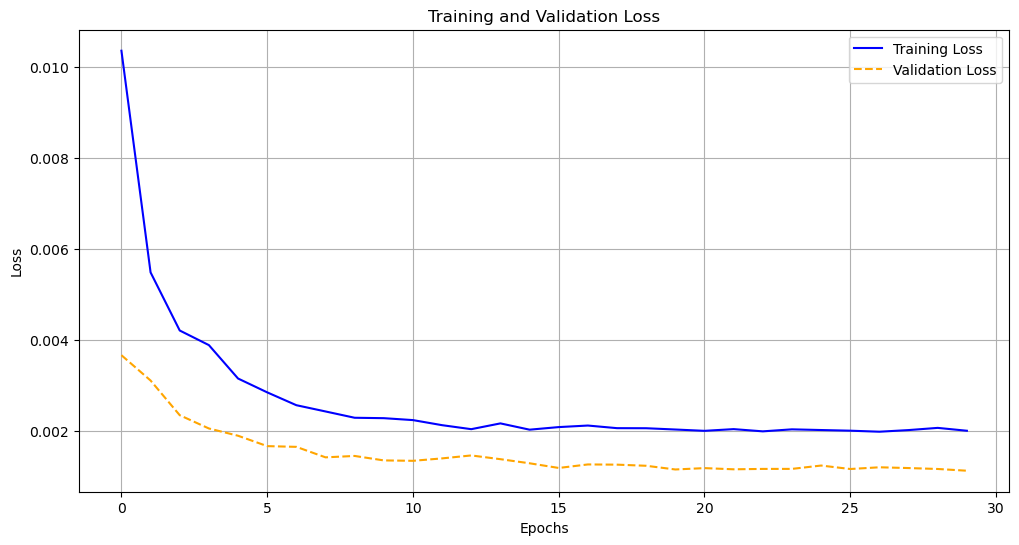

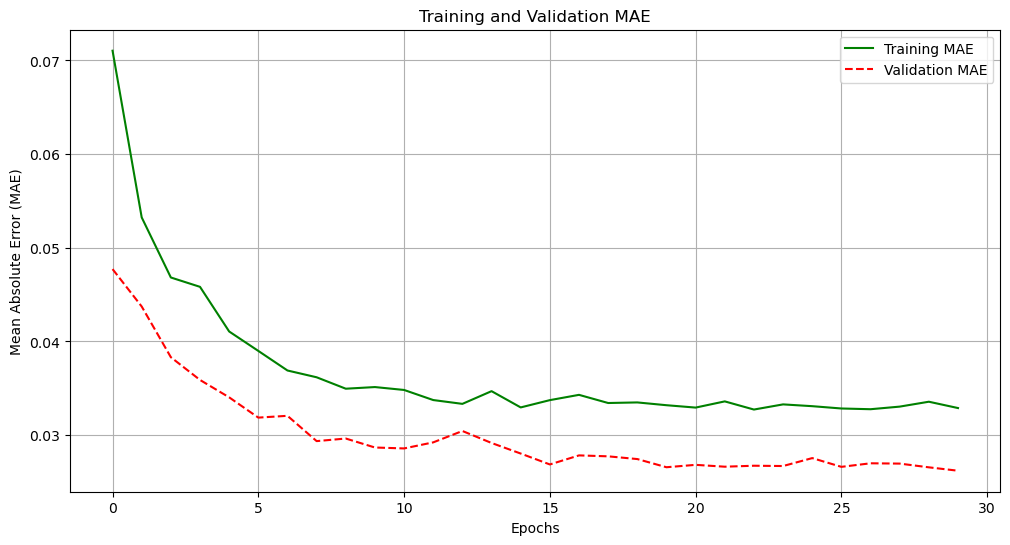

In [207]:
# Obtener los valores de pérdida (loss) y MAE (Mean Absolute Error) del entrenamiento y validación
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']

# Crear la gráfica de pérdida
plt.figure(figsize=(12, 6))
plt.plot(loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', linestyle='--', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Crear la gráfica de MAE
plt.figure(figsize=(12, 6))
plt.plot(mae, label='Training MAE', color='green')
plt.plot(val_mae, label='Validation MAE', linestyle='--', color='red')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.grid(True)
plt.show()

In [208]:
# Make predictions on the training set
y_train_pred_scaled = model_rnn.predict(X_train_scaled)
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled)

# Make predictions on the test set
y_test_pred_scaled = model_rnn.predict(X_test_scaled)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled)

# Inverse transform the original values
y_train_original = scaler_y.inverse_transform(y_train_scaled)
y_test_original = scaler_y.inverse_transform(y_test_scaled)

# Combine train and test predictions for visualization
train_time_steps = range(len(y_train_original))
test_time_steps = range(len(y_train_original), len(y_train_original) + len(y_test_original))


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


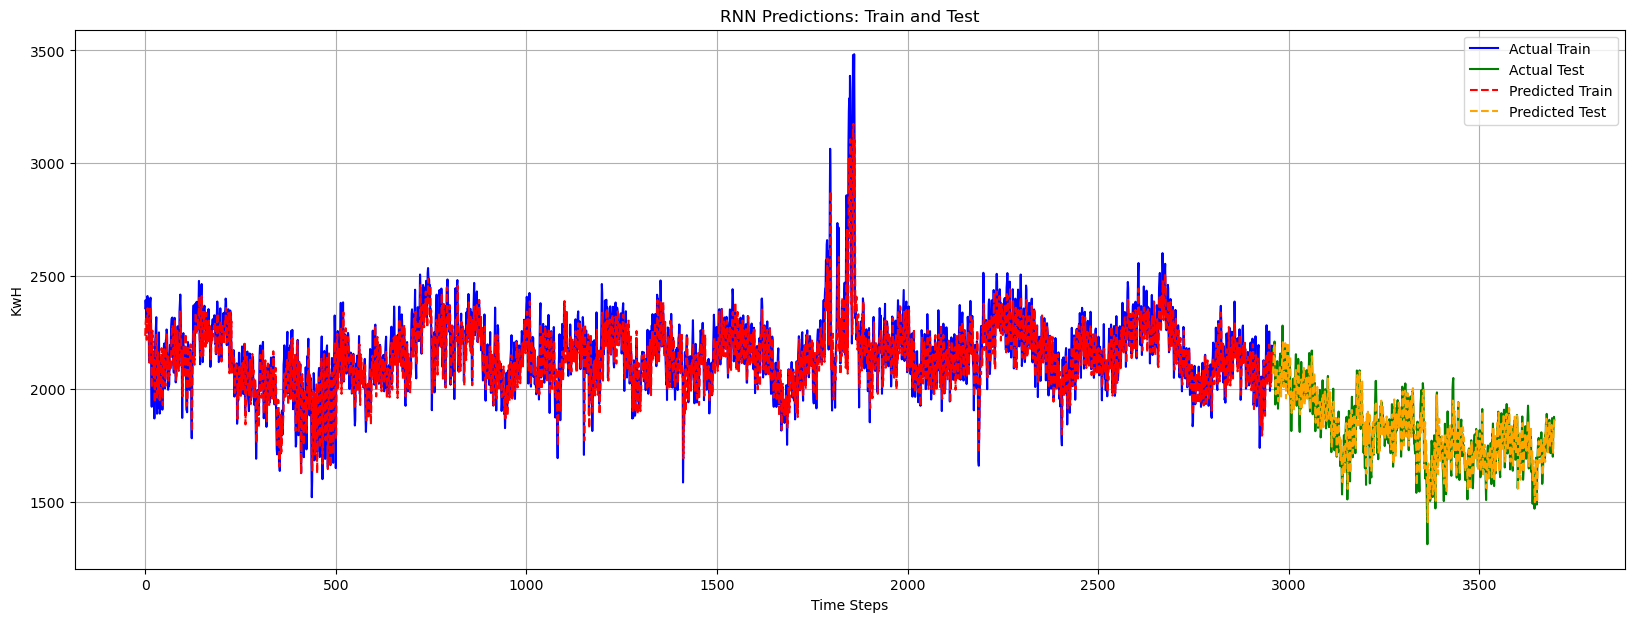

In [209]:
plt.figure(figsize=(20, 7))

# Plot actual values
plt.plot(train_time_steps, y_train_original, label="Actual Train", color="blue")
plt.plot(test_time_steps, y_test_original, label="Actual Test", color="green")

# Plot predictions
plt.plot(train_time_steps, y_train_pred, label="Predicted Train", color="red", linestyle="--")
plt.plot(test_time_steps, y_test_pred, label="Predicted Test", color="orange", linestyle="--")

# Customize the plot
plt.title("RNN Predictions: Train and Test")
plt.xlabel("Time Steps")
plt.ylabel("KwH")
plt.legend()
plt.grid()
plt.show()

In [210]:
# Define functions to calculate MAPE, MAE, and RMSE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def calculate_mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def calculate_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Calculate metrics for training data
mape_train = calculate_mape(y_train_original, y_train_pred)
mae_train = calculate_mae(y_train_original, y_train_pred)
rmse_train = calculate_rmse(y_train_original, y_train_pred)

# Calculate metrics for test data
mape_test = calculate_mape(y_test_original, y_test_pred)
mae_test = calculate_mae(y_test_original, y_test_pred)
rmse_test = calculate_rmse(y_test_original, y_test_pred)

# Create a comparative table
metrics_data = {
    "Dataset": ["Train", "Test"],
    "MAPE (%)": [mape_train, mape_test], #DEBAJO DE 5 ES OKEY
    "MAE": [mae_train, mae_test],
    "RMSE": [rmse_train, rmse_test]
}

metrics_df = pd.DataFrame(metrics_data)
metrics_df

,Dataset,MAPE (%),MAE,RMSE
0,Train,3.018661,65.416263,87.772063
1,Test,2.892977,51.453096,65.737646


# LSTM Prediction

In [925]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# --- Función de generación de secuencias ---
def create_lstm_dataset(series, window_size, step_ahead):
    X, y = [], []
    for i in range(len(series) - window_size - step_ahead + 1):
        X.append(series[i:i + window_size])
        y.append(series[i + window_size:i + window_size + step_ahead])
    return np.array(X), np.array(y)

# --- Preparar datos ---
series = df['value'].values

# Parámetros de la serie temporal
window_size = 21     # días de entrada 
step_ahead = 1       # predicción 1 día adelante 

# Crear X e y
X, y = create_lstm_dataset(series, window_size, step_ahead)

# División train/test (por tiempo)
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Escalado
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
y_train_scaled = scaler_y.fit_transform(y_train)

X_test_scaled = scaler_X.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)
y_test_scaled = scaler_y.transform(y_test)

# Redimensionar para LSTM
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

print(f"X_train shape: {X_train_scaled.shape}")
print(f"y_train shape: {y_train_scaled.shape}")
print(f"X_test shape: {X_test_scaled.shape}")
print(f"y_test shape: {y_test_scaled.shape}")


X_train shape: (2952, 21, 1)
y_train shape: (2952, 1)
X_test shape: (739, 21, 1)
y_test shape: (739, 1)


In [927]:
# Define the LSTM model
model_lstm = Sequential([
    LSTM(16, activation='tanh', input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),  # First LSTM layer
    #se puede probar la fun activacion, el nº de neuronas x capa
    #se puede poner más capas, la red neuronal es más grande, la entrena mas teoricamente, suele funcionar mejor el mo funciona ya muy bien
    Dense(1)  # Output layer
])
# Compile the model
model_lstm.compile(optimizer='adam', loss='mse', metrics=['mae'])


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [928]:
model_lstm.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 16)             │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,169 (4.57 KB)

 Trainable params: 1,169 (4.57 KB)

 Non-trainable params: 0 (0.00 B)

In [930]:
# Train the model
history_lstm = model_lstm.fit(
    X_train_scaled, y_train_scaled,  # Training data
    validation_data=(X_test_scaled, y_test_scaled),  # Validation data
    epochs=40,  # Number of epochs
    batch_size=8,  # Batch size
    verbose=1  # Display progress
)

Epoch 1/40
369/369 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0159 - mae: 0.0869 - val_loss: 0.0046 - val_mae: 0.0540
Epoch 2/40
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0043 - mae: 0.0498 - val_loss: 0.0029 - val_mae: 0.0425
Epoch 3/40
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0041 - mae: 0.0485 - val_loss: 0.0031 - val_mae: 0.0439
Epoch 4/40
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0038 - mae: 0.0472 - val_loss: 0.0026 - val_mae: 0.0405
Epoch 5/40
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0035 - mae: 0.0458 - val_loss: 0.0025 - val_mae: 0.0392
Epoch 6/40
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0034 - mae: 0.0447 - val_loss: 0.0022 - val_mae: 0.0372
Epoch 7/40
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0034 - mae: 0.0445 - val_loss: 0.0019 - val_mae: 0.0349
Epoch 8/40
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0033 - mae: 0.0433 - val_loss: 0.0020 - val_mae: 0.0347
Epoch 9/40
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - lo

In [932]:
# Evaluate the model on the test set
test_loss, test_mae = model_lstm.evaluate(X_test_scaled, y_test_scaled, verbose=0)
print(f"Test Loss (MSE): {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

Test Loss (MSE): 0.0013
Test MAE: 0.0276


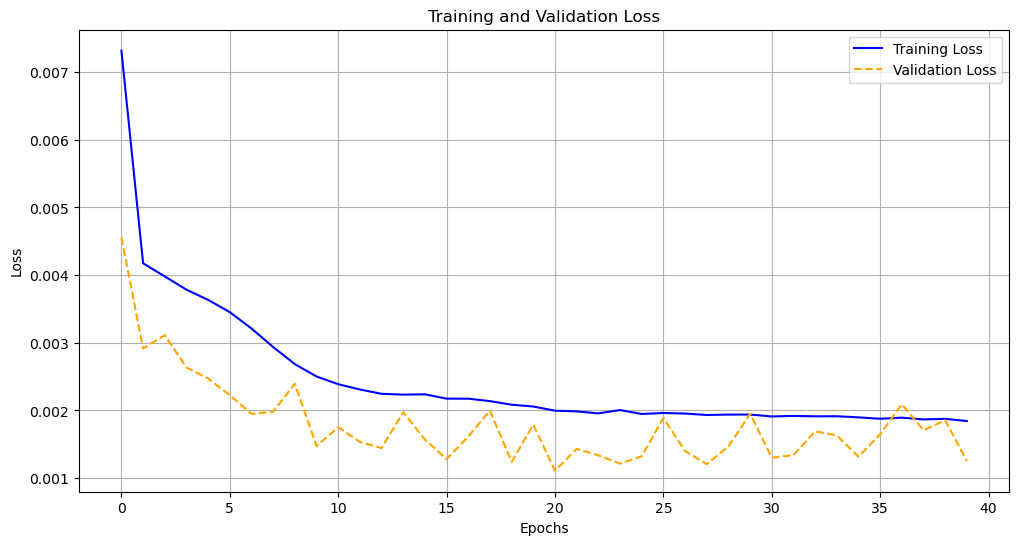

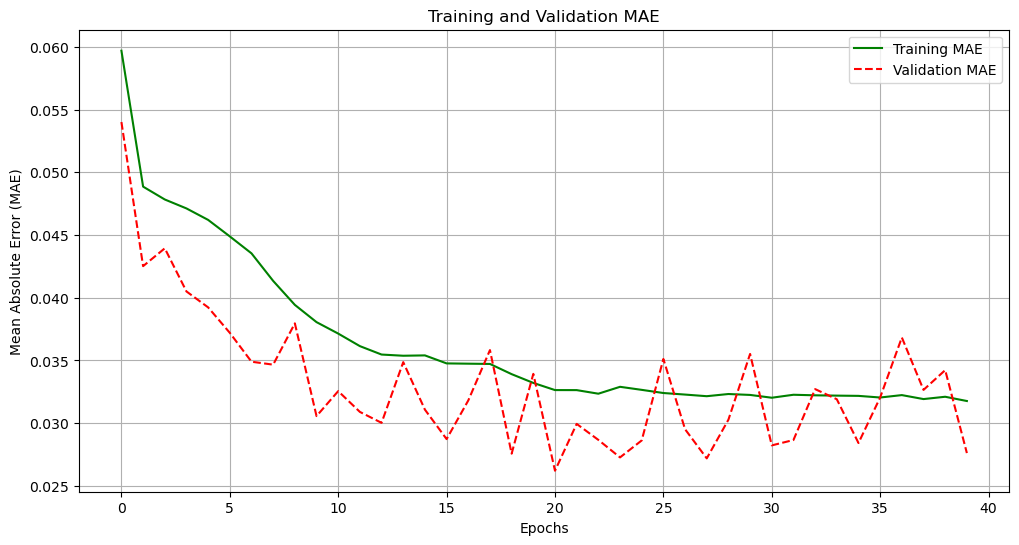

In [933]:
# Obtener los valores de pérdida (loss) y MAE (Mean Absolute Error) del entrenamiento y validación
loss = history_lstm.history['loss']
val_loss = history_lstm.history['val_loss']
mae = history_lstm.history['mae']
val_mae = history_lstm.history['val_mae']

# Crear la gráfica de pérdida
plt.figure(figsize=(12, 6))
plt.plot(loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', linestyle='--', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Crear la gráfica de MAE
plt.figure(figsize=(12, 6))
plt.plot(mae, label='Training MAE', color='green')
plt.plot(val_mae, label='Validation MAE', linestyle='--', color='red')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.grid(True)
plt.show()

In [934]:
# Make predictions on the training set
y_train_pred_scaled = model_lstm.predict(X_train_scaled)
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled)

# Make predictions on the test set
y_test_pred_scaled = model_lstm.predict(X_test_scaled)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled)

# Inverse transform the original values
y_train_original = scaler_y.inverse_transform(y_train_scaled)
y_test_original = scaler_y.inverse_transform(y_test_scaled)

# Combine train and test predictions for visualization
train_time_steps = range(len(y_train_original))
test_time_steps = range(len(y_train_original), len(y_train_original) + len(y_test_original))


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


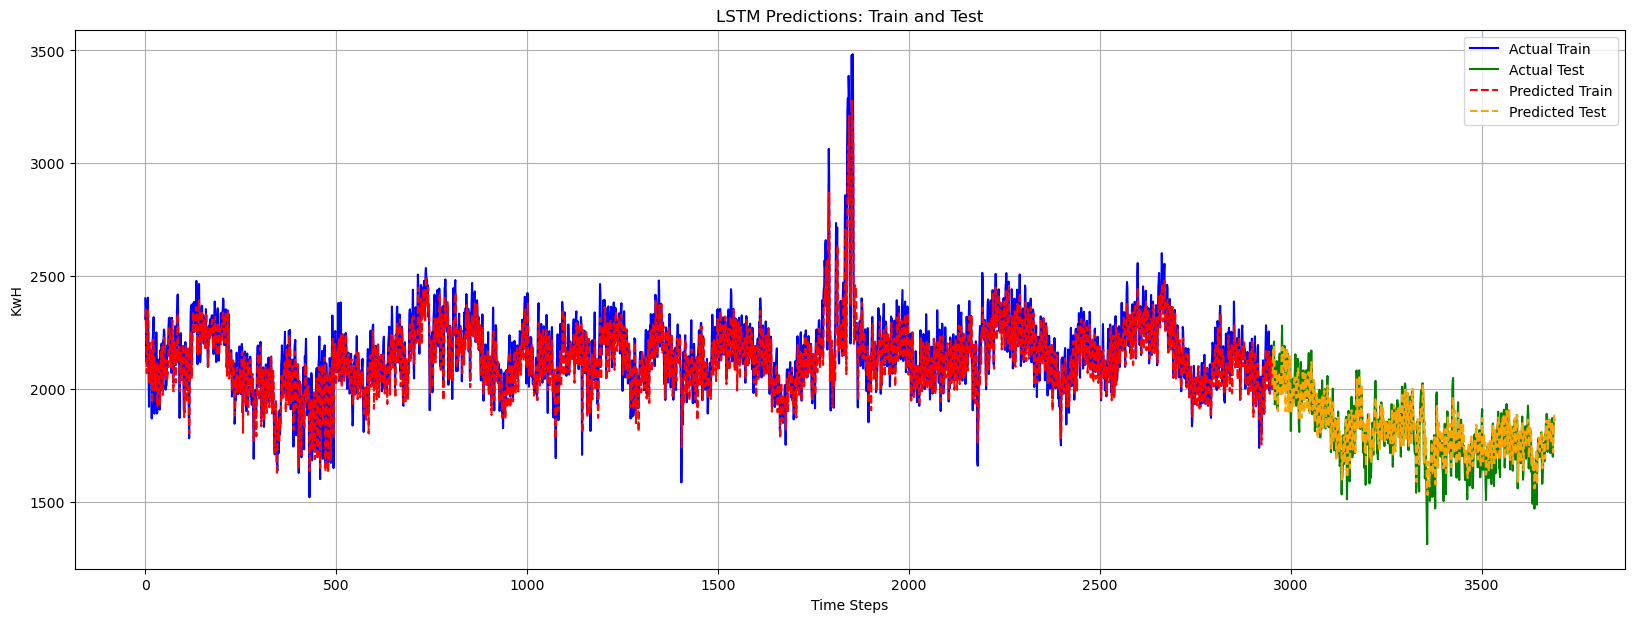

In [935]:
plt.figure(figsize=(20, 7))

# Plot actual values
plt.plot(train_time_steps, y_train_original, label="Actual Train", color="blue")
plt.plot(test_time_steps, y_test_original, label="Actual Test", color="green")

# Plot predictions
plt.plot(train_time_steps, y_train_pred, label="Predicted Train", color="red", linestyle="--")
plt.plot(test_time_steps, y_test_pred, label="Predicted Test", color="orange", linestyle="--")

# Customize the plot
plt.title("LSTM Predictions: Train and Test")
plt.xlabel("Time Steps")
plt.ylabel("KwH")
plt.legend()
plt.grid()
plt.show()

In [936]:
# Calculate metrics for training data
mape_train_lstm = calculate_mape(y_train_original, y_train_pred)
mae_train_lstm = calculate_mae(y_train_original, y_train_pred)
rmse_train_lstm = calculate_rmse(y_train_original, y_train_pred)

# Calculate metrics for test data
mape_test_lstm = calculate_mape(y_test_original, y_test_pred)
mae_test_lstm = calculate_mae(y_test_original, y_test_pred)
rmse_test_lstm = calculate_rmse(y_test_original, y_test_pred)

# Create a comparative table
metrics_data = {
    "Dataset": ["Train", "Test"],
    "MAPE (%)": [mape_train_lstm, mape_test_lstm],
    "MAE": [mae_train_lstm, mae_test_lstm],
    "RMSE": [rmse_train_lstm, rmse_test_lstm]
}

metrics_df = pd.DataFrame(metrics_data)
metrics_df

,Dataset,MAPE (%),MAE,RMSE
0,Train,3.007322,65.183518,86.038151
1,Test,3.079163,54.248960,69.471904


# GRU Prediction

In [943]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# --- Función de generación de secuencias ---
def create_lstm_dataset(series, window_size, step_ahead):
    X, y = [], []
    for i in range(len(series) - window_size - step_ahead + 1):
        X.append(series[i:i + window_size])
        y.append(series[i + window_size:i + window_size + step_ahead])
    return np.array(X), np.array(y)

# --- Preparar datos ---
series = df['value'].values

# Parámetros de la serie temporal
window_size = 21     # días de entrada
step_ahead = 1       # predicción 1 día adelante 

# Crear X e y
X, y = create_lstm_dataset(series, window_size, step_ahead)

# División train/test (por tiempo)
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Escalado
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
y_train_scaled = scaler_y.fit_transform(y_train)

X_test_scaled = scaler_X.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)
y_test_scaled = scaler_y.transform(y_test)

# Redimensionar para LSTM
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

print(f"X_train shape: {X_train_scaled.shape}")
print(f"y_train shape: {y_train_scaled.shape}")
print(f"X_test shape: {X_test_scaled.shape}")
print(f"y_test shape: {y_test_scaled.shape}")


X_train shape: (2952, 21, 1)
y_train shape: (2952, 1)
X_test shape: (739, 21, 1)
y_test shape: (739, 1)


In [944]:
# Define the GRU model
model_gru = Sequential([
    GRU(32, activation='tanh', input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),  # First GRU layer
    Dense(1)  # Output layer
])

# Compile the model
model_gru.compile(optimizer='adam', loss='mse', metrics=['mae'])


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [947]:
model_gru.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 32)             │         3,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [948]:
# Train the model
history_gru = model_gru.fit(
    X_train_scaled, y_train_scaled,  # Training data
    validation_data=(X_test_scaled, y_test_scaled),  # Validation data
    epochs=30,  # Number of epochs
    batch_size=8,  # Batch size
    verbose=1  # Display progress
)

Epoch 1/30
369/369 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0089 - mae: 0.0666 - val_loss: 0.0046 - val_mae: 0.0550
Epoch 2/30
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0033 - mae: 0.0433 - val_loss: 0.0029 - val_mae: 0.0421
Epoch 3/30
369/369 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0029 - mae: 0.0406 - val_loss: 0.0022 - val_mae: 0.0356
Epoch 4/30
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0028 - mae: 0.0392 - val_loss: 0.0016 - val_mae: 0.0311
Epoch 5/30
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0025 - mae: 0.0378 - val_loss: 0.0016 - val_mae: 0.0316
Epoch 6/30
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0022 - mae: 0.0352 - val_loss: 0.0014 - val_mae: 0.0298
Epoch 7/30
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0021 - mae: 0.0348 - val_loss: 0.0014 - val_mae: 0.0295
Epoch 8/30
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0023 - mae: 0.0359 - val_loss: 0.0016 - val_mae: 0.0310
Epoch 9/30
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - l

In [950]:
# Evaluate the model on the test set
test_loss, test_mae = model_gru.evaluate(X_test_scaled, y_test_scaled, verbose=0)
print(f"Test Loss (MSE): {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

Test Loss (MSE): 0.0012
Test MAE: 0.0274


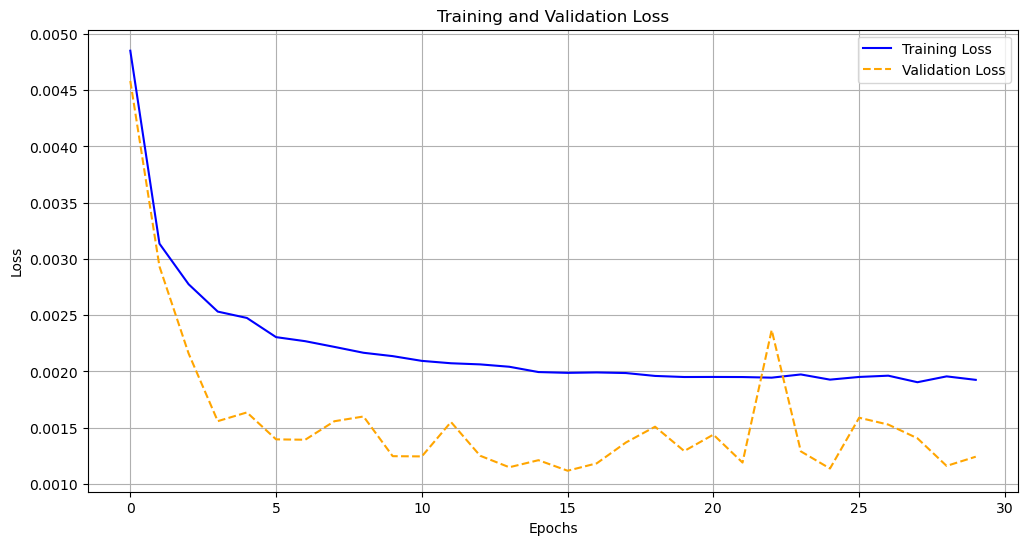

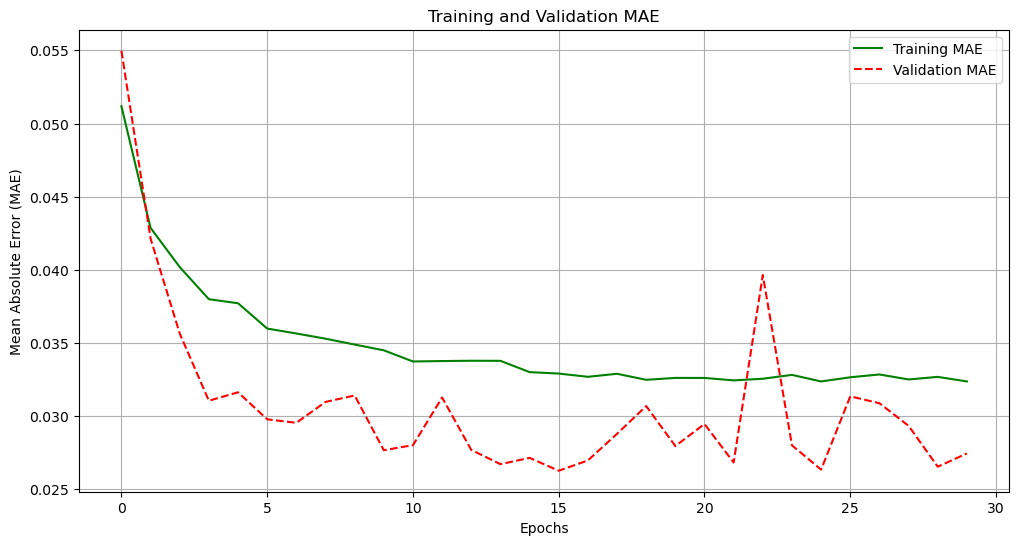

In [951]:
# Obtener los valores de pérdida (loss) y MAE (Mean Absolute Error) del entrenamiento y validación
loss = history_gru.history['loss']
val_loss = history_gru.history['val_loss']
mae = history_gru.history['mae']
val_mae = history_gru.history['val_mae']

# Crear la gráfica de pérdida
plt.figure(figsize=(12, 6))
plt.plot(loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', linestyle='--', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Crear la gráfica de MAE
plt.figure(figsize=(12, 6))
plt.plot(mae, label='Training MAE', color='green')
plt.plot(val_mae, label='Validation MAE', linestyle='--', color='red')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.grid(True)
plt.show()

In [952]:
# Make predictions on the training set
y_train_pred_scaled = model_gru.predict(X_train_scaled)
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled)

# Make predictions on the test set
y_test_pred_scaled = model_gru.predict(X_test_scaled)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled)

# Inverse transform the original values
y_train_original = scaler_y.inverse_transform(y_train_scaled)
y_test_original = scaler_y.inverse_transform(y_test_scaled)

# Combine train and test predictions for visualization
train_time_steps = range(len(y_train_original))
test_time_steps = range(len(y_train_original), len(y_train_original) + len(y_test_original))


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


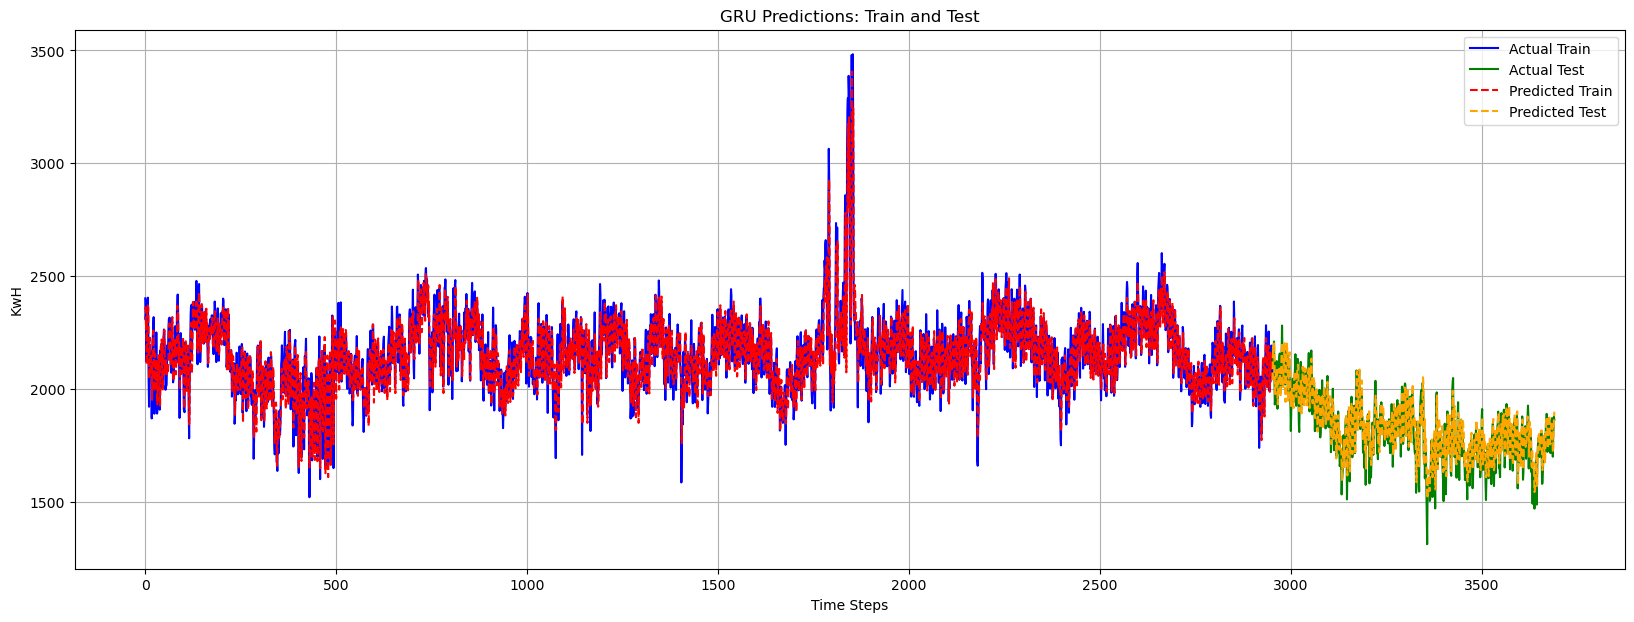

In [953]:
plt.figure(figsize=(20, 7))

# Plot actual values
plt.plot(train_time_steps, y_train_original, label="Actual Train", color="blue")
plt.plot(test_time_steps, y_test_original, label="Actual Test", color="green")

# Plot predictions
plt.plot(train_time_steps, y_train_pred, label="Predicted Train", color="red", linestyle="--")
plt.plot(test_time_steps, y_test_pred, label="Predicted Test", color="orange", linestyle="--")

# Customize the plot
plt.title("GRU Predictions: Train and Test")
plt.xlabel("Time Steps")
plt.ylabel("KwH")
plt.legend()
plt.grid()
plt.show()

In [954]:
# Calculate metrics for training data
mape_train_gru = calculate_mape(y_train_original, y_train_pred)
mae_train_gru = calculate_mae(y_train_original, y_train_pred)
rmse_train_gru = calculate_rmse(y_train_original, y_train_pred)

# Calculate metrics for test data
mape_test_gru = calculate_mape(y_test_original, y_test_pred)
mae_test_gru = calculate_mae(y_test_original, y_test_pred)
rmse_test_gru= calculate_rmse(y_test_original, y_test_pred)

# Create a comparative table
metrics_data = {
    "Dataset": ["Train", "Test"],
    "MAPE (%)": [mape_train_gru, mape_test_gru],
    "MAE": [mae_train_gru, mae_test_gru],
    "RMSE": [rmse_train_gru, rmse_test_gru]
}

metrics_df = pd.DataFrame(metrics_data)
metrics_df

,Dataset,MAPE (%),MAE,RMSE
0,Train,2.860838,61.574966,83.731370
1,Test,3.058017,53.910801,69.212771


# LSTM STACKED


In [1005]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# --- Función de generación de secuencias ---
def create_lstm_dataset(series, window_size, step_ahead):
    X, y = [], []
    for i in range(len(series) - window_size - step_ahead + 1):
        X.append(series[i:i + window_size])
        y.append(series[i + window_size:i + window_size + step_ahead])
    return np.array(X), np.array(y)

# --- Preparar datos ---
series = df['value'].values

# Parámetros de la serie temporal
window_size = 30     # días de entrada 
step_ahead = 1       # predicción 1 día adelante 

# Crear X e y
X, y = create_lstm_dataset(series, window_size, step_ahead)

# División train/test (por tiempo)
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Escalado
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
y_train_scaled = scaler_y.fit_transform(y_train)

X_test_scaled = scaler_X.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)
y_test_scaled = scaler_y.transform(y_test)

# Redimensionar para LSTM
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

print(f"X_train shape: {X_train_scaled.shape}")
print(f"y_train shape: {y_train_scaled.shape}")
print(f"X_test shape: {X_test_scaled.shape}")
print(f"y_test shape: {y_test_scaled.shape}")


X_train shape: (2945, 30, 1)
y_train shape: (2945, 1)
X_test shape: (737, 30, 1)
y_test shape: (737, 1)


In [1007]:
# Define the Stacked LSTM model
model_lstm_stacked = Sequential([
    LSTM(32, activation='tanh', return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),  # First LSTM layer
    LSTM(32, activation='tanh'),  # Second LSTM layer
    Dense(1)  # Output layer
])

# Compile the model
model_lstm_stacked.compile(optimizer='adam', loss='mse', metrics=['mae'])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [1009]:
model_lstm_stacked.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_15 (LSTM)                  │ (None, 30, 32)         │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_16 (LSTM)                  │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,705 (49.63 KB)

 Trainable params: 12,705 (49.63 KB)

 Non-trainable params: 0 (0.00 B)

In [1010]:
# Train the model
history_lstm_stacked = model_lstm_stacked.fit(
    X_train_scaled, y_train_scaled,  # Training data
    validation_data=(X_test_scaled, y_test_scaled),  # Validation data
    epochs=40,  # Number of epochs
    batch_size=32,  # Batch size
    verbose=1  # Display progress
)

Epoch 1/40
93/93 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0201 - mae: 0.1038 - val_loss: 0.0089 - val_mae: 0.0805
Epoch 2/40
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0049 - mae: 0.0526 - val_loss: 0.0045 - val_mae: 0.0538
Epoch 3/40
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0045 - mae: 0.0505 - val_loss: 0.0057 - val_mae: 0.0614
Epoch 4/40
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0049 - mae: 0.0520 - val_loss: 0.0032 - val_mae: 0.0448
Epoch 5/40
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0046 - mae: 0.0520 - val_loss: 0.0055 - val_mae: 0.0607
Epoch 6/40
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0046 - mae: 0.0513 - val_loss: 0.0045 - val_mae: 0.0540
Epoch 7/40
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0044 - mae: 0.0501 - val_loss: 0.0047 - val_mae: 0.0548
Epoch 8/40
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0044 - mae: 0.0502 - val_loss: 0.0037 - val_mae: 0.0485
Epoch 9/40
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.004

In [1012]:
# Evaluate the model on the test set
test_loss, test_mae = model_lstm_stacked.evaluate(X_test_scaled, y_test_scaled, verbose=0)
print(f"Test Loss (MSE): {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

Test Loss (MSE): 0.0011
Test MAE: 0.0268


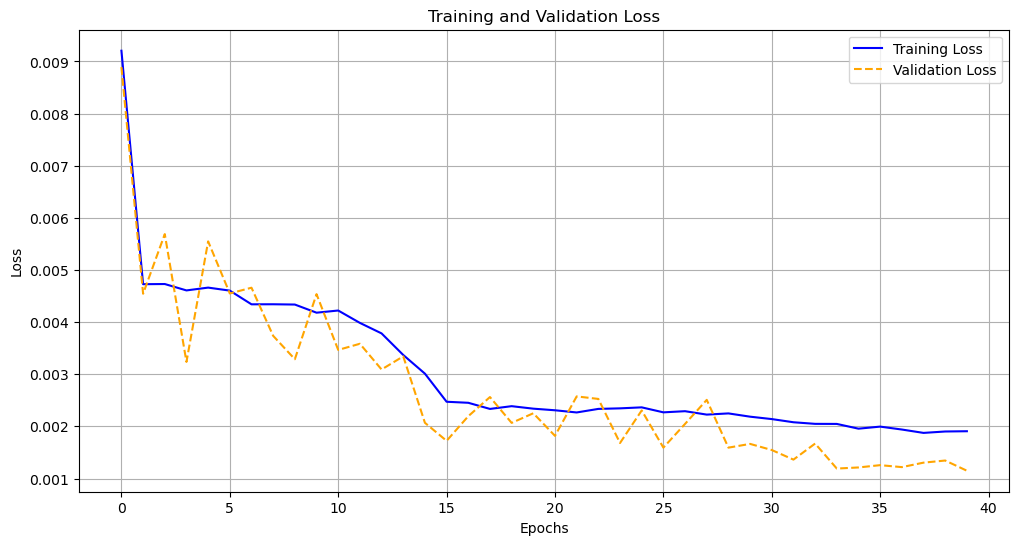

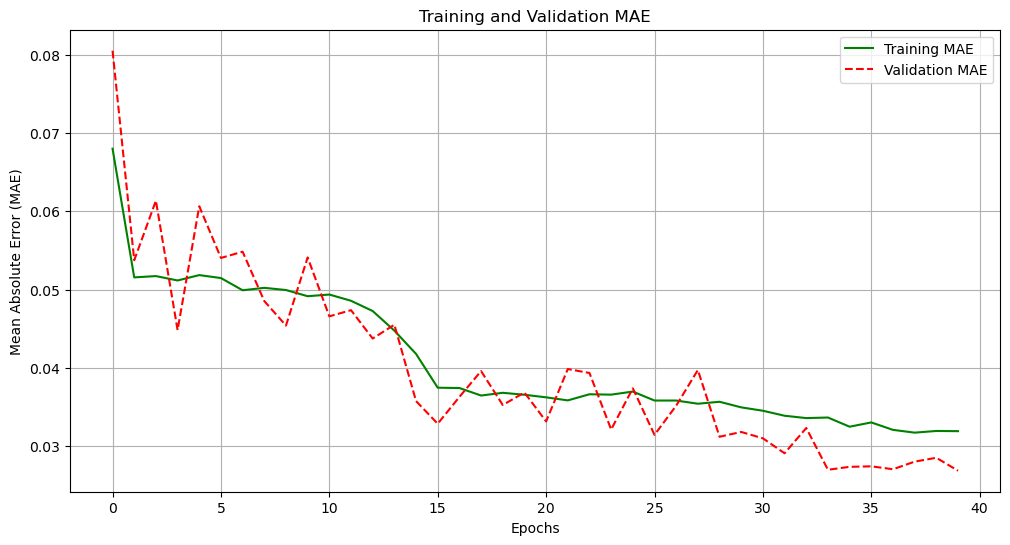

In [1013]:
# Obtener los valores de pérdida (loss) y MAE (Mean Absolute Error) del entrenamiento y validación
loss = history_lstm_stacked.history['loss']
val_loss = history_lstm_stacked.history['val_loss']
mae = history_lstm_stacked.history['mae']
val_mae = history_lstm_stacked.history['val_mae']

# Crear la gráfica de pérdida
plt.figure(figsize=(12, 6))
plt.plot(loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', linestyle='--', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Crear la gráfica de MAE
plt.figure(figsize=(12, 6))
plt.plot(mae, label='Training MAE', color='green')
plt.plot(val_mae, label='Validation MAE', linestyle='--', color='red')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.grid(True)
plt.show()

In [1014]:
# Make predictions on the training set
y_train_pred_scaled = model_lstm_stacked.predict(X_train_scaled)
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled)

# Make predictions on the test set
y_test_pred_scaled = model_lstm_stacked.predict(X_test_scaled)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled)

# Inverse transform the original values
y_train_original = scaler_y.inverse_transform(y_train_scaled)
y_test_original = scaler_y.inverse_transform(y_test_scaled)

# Combine train and test predictions for visualization
train_time_steps = range(len(y_train_original))
test_time_steps = range(len(y_train_original), len(y_train_original) + len(y_test_original))

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


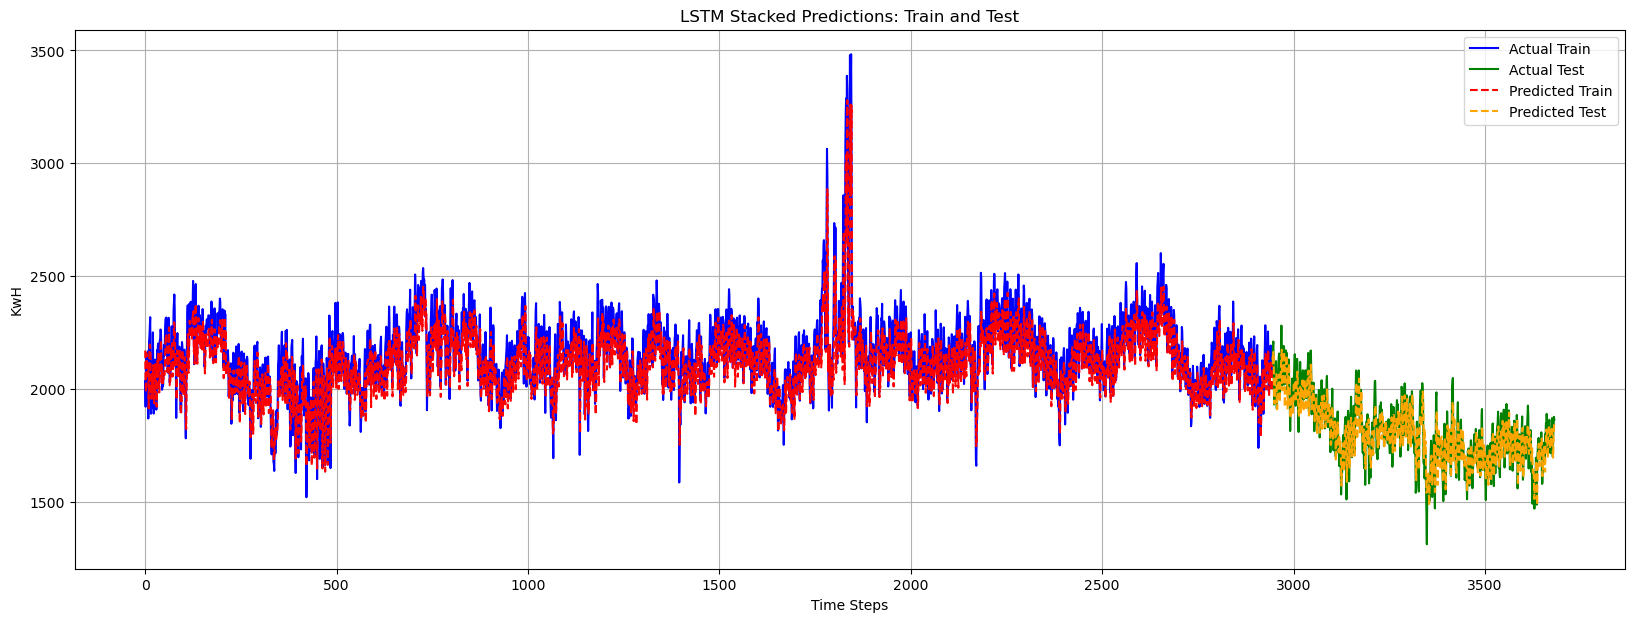

In [1015]:
plt.figure(figsize=(20, 7))

# Plot actual values
plt.plot(train_time_steps, y_train_original, label="Actual Train", color="blue")
plt.plot(test_time_steps, y_test_original, label="Actual Test", color="green")

# Plot predictions
plt.plot(train_time_steps, y_train_pred, label="Predicted Train", color="red", linestyle="--")
plt.plot(test_time_steps, y_test_pred, label="Predicted Test", color="orange", linestyle="--")

# Customize the plot
plt.title("LSTM Stacked Predictions: Train and Test")
plt.xlabel("Time Steps")
plt.ylabel("KwH")
plt.legend()
plt.grid()
plt.show()

In [1016]:
# Calculate metrics for training data
mape_train_lstm_stacked = calculate_mape(y_train_original, y_train_pred)
mae_train_lstm_stacked = calculate_mae(y_train_original, y_train_pred)
rmse_train_lstm_stacked = calculate_rmse(y_train_original, y_train_pred)

# Calculate metrics for test data
mape_test_lstm_stacked = calculate_mape(y_test_original, y_test_pred)
mae_test_lstm_stacked = calculate_mae(y_test_original, y_test_pred)
rmse_test_lstm_stacked = calculate_rmse(y_test_original, y_test_pred)

# Create a comparative table
metrics_data = {
    "Dataset": ["Train", "Test"],
    "MAPE (%)": [mape_train_lstm_stacked, mape_test_lstm_stacked],
    "MAE": [mae_train_lstm_stacked, mae_test_lstm_stacked],
    "RMSE": [rmse_train_lstm_stacked, rmse_test_lstm_stacked]
}

metrics_df = pd.DataFrame(metrics_data)
metrics_df

,Dataset,MAPE (%),MAE,RMSE
0,Train,3.354822,73.386827,94.952179
1,Test,2.937666,52.706327,66.584803


# Transformer

In [739]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# --- Función de generación de secuencias ---
def create_lstm_dataset(series, window_size, step_ahead):
    X, y = [], []
    for i in range(len(series) - window_size - step_ahead + 1):
        X.append(series[i:i + window_size])
        y.append(series[i + window_size:i + window_size + step_ahead])
    return np.array(X), np.array(y)

# --- Preparar datos ---
series = df['value'].values

# Parámetros de la serie temporal
window_size = 21     # días de entrada 
step_ahead = 1      # predicción 1 día adelante 

# Crear X e y
X, y = create_lstm_dataset(series, window_size, step_ahead)

# División train/test (por tiempo)
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Escalado
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
y_train_scaled = scaler_y.fit_transform(y_train)

X_test_scaled = scaler_X.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)
y_test_scaled = scaler_y.transform(y_test)

# Redimensionar para LSTM
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

print(f"X_train shape: {X_train_scaled.shape}")
print(f"y_train shape: {y_train_scaled.shape}")
print(f"X_test shape: {X_test_scaled.shape}")
print(f"y_test shape: {y_test_scaled.shape}")


X_train shape: (2952, 21, 1)
y_train shape: (2952, 1)
X_test shape: (739, 21, 1)
y_test shape: (739, 1)


In [769]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LayerNormalization, Dropout, GlobalAveragePooling1D
from tensorflow.keras.layers import MultiHeadAttention, Add, Embedding
from tensorflow.keras import layers

# Positional embedding aprendible (opcional: puedes usar seno-coseno si lo prefieres)
class PositionalEmbedding(layers.Layer):
    def __init__(self, sequence_length, d_model):
        super().__init__()
        self.pos_embedding = Embedding(input_dim=sequence_length, output_dim=d_model)

    def call(self, x):
        positions = tf.range(start=0, limit=tf.shape(x)[1], delta=1)
        pos_embeddings = self.pos_embedding(positions)
        return x + pos_embeddings

import tensorflow as tf

# Parámetros
sequence_length = X_train_scaled.shape[1]
n_features = X_train_scaled.shape[2]
d_model = 16 # tamaño embedding, probar con 16,32 y64
n_heads = 6 # tamaño cabezas de atención, probar con 4,6,8
dropout_rate = 0.1

# Input
inputs = Input(shape=(sequence_length, n_features))

# Positional embedding
x = Dense(d_model)(inputs)  # proyectar a dimensión d_model
x = PositionalEmbedding(sequence_length, d_model)(x)

# Transformer encoder block
attn_output = MultiHeadAttention(num_heads=n_heads, key_dim=d_model)(x, x)
attn_output = Dropout(dropout_rate)(attn_output)
x = Add()([x, attn_output])
x = LayerNormalization()(x)

# Feedforward
ffn = Dense(d_model*2, activation='relu')(x)
ffn = Dense(d_model)(ffn)
ffn = Dropout(dropout_rate)(ffn)
x = Add()([x, ffn])
x = LayerNormalization()(x)

# Pooling y salida
x = GlobalAveragePooling1D()(x)
output = Dense(1)(x)

# Modelo
model_att_trans = Model(inputs=inputs, outputs=output)
model_att_trans.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [771]:
# Train the model
history_att_trans = model_att_trans.fit(
    X_train_scaled, y_train_scaled,  # Training data
    validation_data=(X_test_scaled, y_test_scaled),  # Validation data
    epochs=40,  # Number of epochs
    batch_size= 8 ,  # Batch size
    verbose=1  # Display progress
)

Epoch 1/40
369/369 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0175 - mae: 0.0958 - val_loss: 0.0255 - val_mae: 0.1364
Epoch 2/40
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0061 - mae: 0.0592 - val_loss: 0.0038 - val_mae: 0.0488
Epoch 3/40
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0059 - mae: 0.0601 - val_loss: 0.0079 - val_mae: 0.0688
Epoch 4/40
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0042 - mae: 0.0493 - val_loss: 0.0064 - val_mae: 0.0675
Epoch 5/40
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0034 - mae: 0.0448 - val_loss: 0.0035 - val_mae: 0.0495
Epoch 6/40
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0030 - mae: 0.0415 - val_loss: 0.0025 - val_mae: 0.0408
Epoch 7/40
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0029 - mae: 0.0409 - val_loss: 0.0019 - val_mae: 0.0340
Epoch 8/40
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0027 - mae: 0.0393 - val_loss: 0.0015 - val_mae: 0.0303
Epoch 9/40
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - lo

In [772]:
# Evaluate the model on the test set
test_loss, test_mae = model_att_trans.evaluate(X_test_scaled, y_test_scaled, verbose=0)
print(f"Test Loss (MSE): {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

Test Loss (MSE): 0.0012
Test MAE: 0.0272


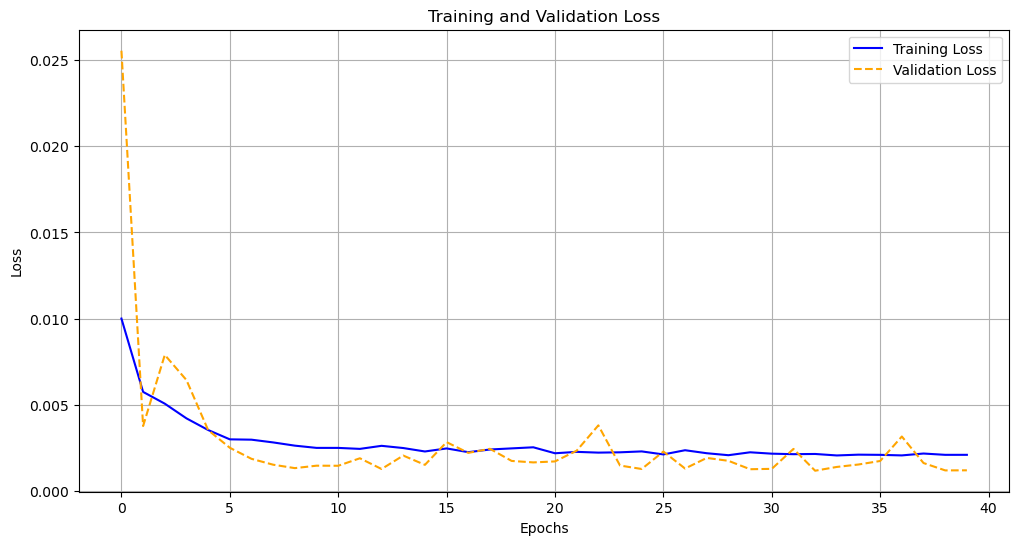

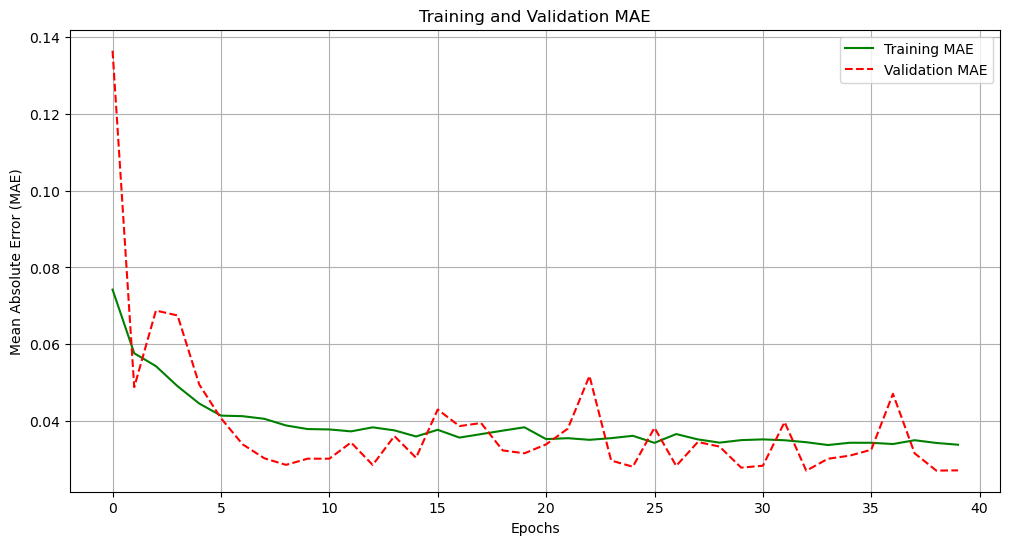

In [773]:
# Obtener los valores de pérdida (loss) y MAE (Mean Absolute Error) del entrenamiento y validación
loss = history_att_trans.history['loss']
val_loss = history_att_trans.history['val_loss']
mae = history_att_trans.history['mae']
val_mae = history_att_trans.history['val_mae']

# Crear la gráfica de pérdida
plt.figure(figsize=(12, 6))
plt.plot(loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', linestyle='--', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Crear la gráfica de MAE
plt.figure(figsize=(12, 6))
plt.plot(mae, label='Training MAE', color='green')
plt.plot(val_mae, label='Validation MAE', linestyle='--', color='red')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.grid(True)
plt.show()

In [774]:
# Make predictions on the training set
y_train_pred_scaled = model_att_trans.predict(X_train_scaled)
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled)

# Make predictions on the test set
y_test_pred_scaled = model_att_trans.predict(X_test_scaled)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled)

# Inverse transform the original values
y_train_original = scaler_y.inverse_transform(y_train_scaled)
y_test_original = scaler_y.inverse_transform(y_test_scaled)

# Combine train and test predictions for visualization
train_time_steps = range(len(y_train_original))
test_time_steps = range(len(y_train_original), len(y_train_original) + len(y_test_original))

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


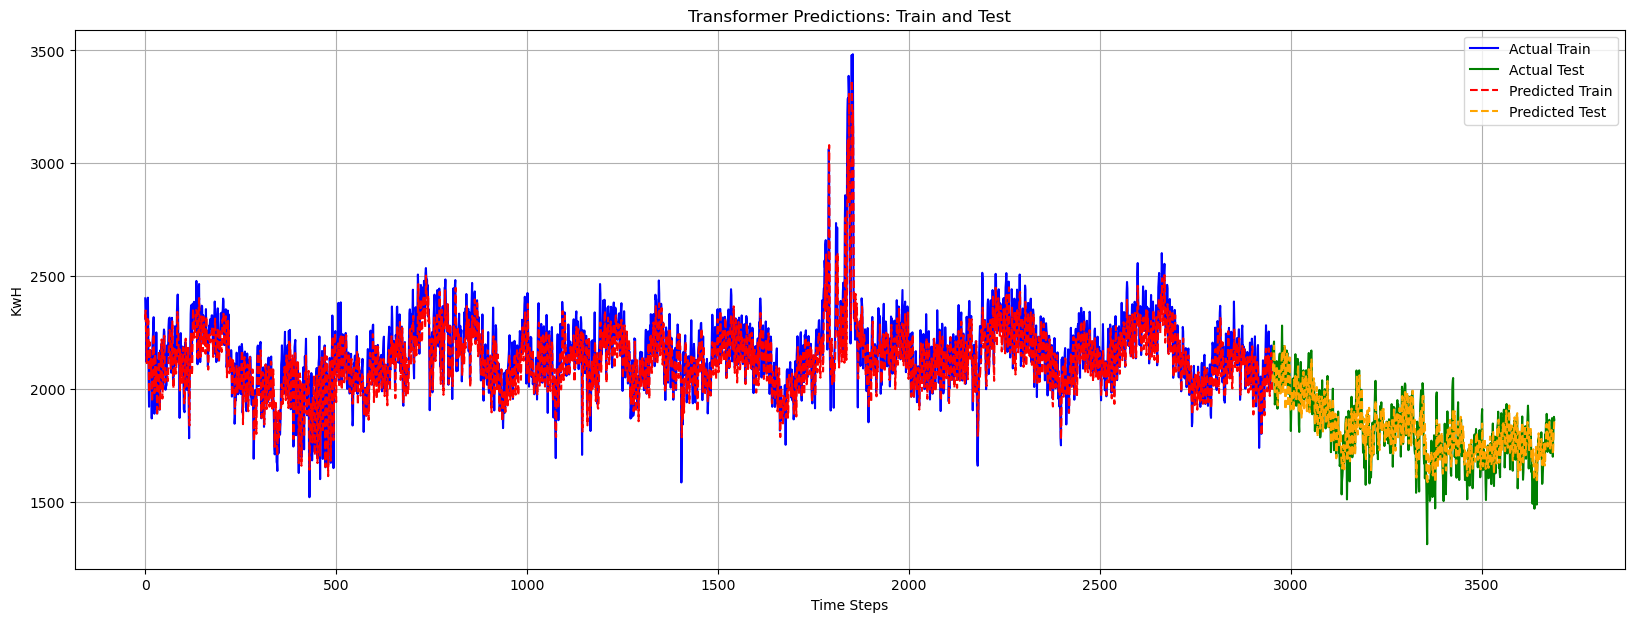

In [775]:
plt.figure(figsize=(20, 7))

# Plot actual values
plt.plot(train_time_steps, y_train_original, label="Actual Train", color="blue")
plt.plot(test_time_steps, y_test_original, label="Actual Test", color="green")

# Plot predictions
plt.plot(train_time_steps, y_train_pred, label="Predicted Train", color="red", linestyle="--")
plt.plot(test_time_steps, y_test_pred, label="Predicted Test", color="orange", linestyle="--")

# Customize the plot
plt.title("Transformer Predictions: Train and Test")
plt.xlabel("Time Steps")
plt.ylabel("KwH")
plt.legend()
plt.grid()
plt.show()

In [776]:
# Calculate metrics for training data
mape_train_att_trans = calculate_mape(y_train_original, y_train_pred)
mae_train_att_trans= calculate_mae(y_train_original, y_train_pred)
rmse_train_att_trans= calculate_rmse(y_train_original, y_train_pred)

# Calculate metrics for test data
mape_test_att_trans = calculate_mape(y_test_original, y_test_pred)
mae_test_att_trans= calculate_mae(y_test_original, y_test_pred)
rmse_test_att_trans = calculate_rmse(y_test_original, y_test_pred)

# Create a comparative table
metrics_data = {
    "Dataset": ["Train", "Test"],
    "MAPE (%)": [mape_train_att_trans, mape_test_att_trans],
    "MAE": [mae_train_att_trans, mae_test_att_trans],
    "RMSE": [rmse_train_att_trans, rmse_test_att_trans]
}

metrics_df = pd.DataFrame(metrics_data)
metrics_df

,Dataset,MAPE (%),MAE,RMSE
0,Train,3.051970,66.407266,86.541411
1,Test,3.017175,53.373575,68.566195


# RANDOM SEARCH

# RANDOM SEARCH RNN SIMPLE

In [101]:
import random
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from keras.backend import clear_session
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from itertools import product
import matplotlib.pyplot as plt

# Dataset
def create_lstm_dataset(series, window_size, step_ahead):
    X, y = [], []
    for i in range(len(series) - window_size - step_ahead + 1):
        X.append(series[i:i + window_size])
        y.append(series[i + window_size:i + window_size + step_ahead])
    return np.array(X), np.array(y)

# Métricas
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def calculate_mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def calculate_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Espacio de hiperparámetros
param_grid = {
    "window_size": [14, 21, 30],
    "step_ahead": [1],
    "epochs": [30],
    "batch_size": [8, 16, 32],
    "activation": ['tanh', 'relu'],
    "n_layers": [1],
    "n_neurons": [8, 16, 32]
}

# Generar todas las combinaciones posibles
all_combinations = list(product(*param_grid.values()))

# Elegir aleatoriamente N combinaciones únicas
n_samples = 20
random_combinations = random.sample(all_combinations, min(n_samples, len(all_combinations)))

# Serie
series = df['value'].values
results = []

# Random Search
for params in random_combinations:
    config = dict(zip(param_grid.keys(), params))
    print(f"Evaluando configuración: {config}")
    clear_session()

    # Preparar datos
    X, y = create_lstm_dataset(series, config["window_size"], config["step_ahead"])
    split_index = int(len(X) * 0.8)
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()
    X_train_scaled = scaler_X.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
    y_train_scaled = scaler_y.fit_transform(y_train)
    X_test_scaled = scaler_X.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)
    y_test_scaled = scaler_y.transform(y_test)

    X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
    X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

    # Modelo
    model = Sequential([
        SimpleRNN(config["n_neurons"], activation=config["activation"], input_shape=(X_train_scaled.shape[1], 1)),
        Dense(config["step_ahead"])
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    model.fit(
        X_train_scaled, y_train_scaled,
        validation_data=(X_test_scaled, y_test_scaled),
        epochs=config["epochs"],
        batch_size=config["batch_size"],
        verbose=0
    )

    # Predecir
    y_pred_scaled = model.predict(X_test_scaled)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_true = scaler_y.inverse_transform(y_test_scaled)

    mape = calculate_mape(y_true, y_pred)
    mae = calculate_mae(y_true, y_pred)
    rmse = calculate_rmse(y_true, y_pred)

    results.append({
        **config,
        "MAPE": mape,
        "MAE": mae,
        "RMSE": rmse
    })

# Mostrar mejores resultados
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='MAPE')
print(results_df.head(20))  # Muestra los 10 mejores resultados


Evaluando configuración: {'window_size': 30, 'step_ahead': 1, 'epochs': 30, 'batch_size': 16, 'activation': 'relu', 'n_layers': 1, 'n_neurons': 16}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Evaluando configuración: {'window_size': 30, 'step_ahead': 1, 'epochs': 30, 'batch_size': 8, 'activation': 'relu', 'n_layers': 1, 'n_neurons': 16}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Evaluando configuración: {'window_size': 21, 'step_ahead': 1, 'epochs': 30, 'batch_size': 8, 'activation': 'relu', 'n_layers': 1, 'n_neurons': 16}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Evaluando configuración: {'window_size': 14, 'step_ahead': 1, 'epochs': 30, 'batch_size': 8, 'activation': 'relu', 'n_layers': 1, 'n_neurons': 32}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Evaluando configuración: {'window_size': 21, 'step_ahead': 1, 'epochs': 30, 'batch_size': 16, 'activation': 'relu', 'n_layers': 1, 'n_neurons': 8}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Evaluando configuración: {'window_size': 30, 'step_ahead': 1, 'epochs': 30, 'batch_size': 32, 'activation': 'tanh', 'n_layers': 1, 'n_neurons': 32}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Evaluando configuración: {'window_size': 14, 'step_ahead': 1, 'epochs': 30, 'batch_size': 32, 'activation': 'tanh', 'n_layers': 1, 'n_neurons': 32}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Evaluando configuración: {'window_size': 30, 'step_ahead': 1, 'epochs': 30, 'batch_size': 16, 'activation': 'relu', 'n_layers': 1, 'n_neurons': 32}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Evaluando configuración: {'window_size': 21, 'step_ahead': 1, 'epochs': 30, 'batch_size': 32, 'activation': 'tanh', 'n_layers': 1, 'n_neurons': 8}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Evaluando configuración: {'window_size': 30, 'step_ahead': 1, 'epochs': 30, 'batch_size': 16, 'activation': 'tanh', 'n_layers': 1, 'n_neurons': 16}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Evaluando configuración: {'window_size': 21, 'step_ahead': 1, 'epochs': 30, 'batch_size': 8, 'activation': 'tanh', 'n_layers': 1, 'n_neurons': 32}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Evaluando configuración: {'window_size': 14, 'step_ahead': 1, 'epochs': 30, 'batch_size': 8, 'activation': 'tanh', 'n_layers': 1, 'n_neurons': 16}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Evaluando configuración: {'window_size': 30, 'step_ahead': 1, 'epochs': 30, 'batch_size': 8, 'activation': 'relu', 'n_layers': 1, 'n_neurons': 8}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Evaluando configuración: {'window_size': 21, 'step_ahead': 1, 'epochs': 30, 'batch_size': 16, 'activation': 'relu', 'n_layers': 1, 'n_neurons': 16}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Evaluando configuración: {'window_size': 21, 'step_ahead': 1, 'epochs': 30, 'batch_size': 32, 'activation': 'relu', 'n_layers': 1, 'n_neurons': 8}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Evaluando configuración: {'window_size': 14, 'step_ahead': 1, 'epochs': 30, 'batch_size': 32, 'activation': 'tanh', 'n_layers': 1, 'n_neurons': 8}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Evaluando configuración: {'window_size': 21, 'step_ahead': 1, 'epochs': 30, 'batch_size': 16, 'activation': 'tanh', 'n_layers': 1, 'n_neurons': 8}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Evaluando configuración: {'window_size': 21, 'step_ahead': 1, 'epochs': 30, 'batch_size': 32, 'activation': 'tanh', 'n_layers': 1, 'n_neurons': 32}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Evaluando configuración: {'window_size': 21, 'step_ahead': 1, 'epochs': 30, 'batch_size': 8, 'activation': 'tanh', 'n_layers': 1, 'n_neurons': 8}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Evaluando configuración: {'window_size': 14, 'step_ahead': 1, 'epochs': 30, 'batch_size': 16, 'activation': 'relu', 'n_layers': 1, 'n_neurons': 8}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
    window_size  step_ahead  epochs  batch_size activation  n_layers  \
6            14           1      30          32       tanh         1   
17           21           1      30          32       tanh         1   
18           21           1      30           8       tanh         1   
2            21           1      30           8       relu         1   
11           14           1      30           8       tanh         1   
9            30           1      30          16       tanh         1   
1            30           1      30           8       relu         1   
19           14           1      30          16       relu         1   
15           14           1      30          32       tanh         1   
0            30           1      30          16       relu         1   
14           21           1      30          32       relu         1   
10           21           1      30           8       tanh         1   
3            14         

# RANDOM SEARCH LSTM

In [105]:
import random
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.backend import clear_session
from sklearn.preprocessing import MinMaxScaler

# Función para crear dataset
def create_lstm_dataset(series, window_size, step_ahead):
    X, y = [], []
    for i in range(len(series) - window_size - step_ahead + 1):
        X.append(series[i:i + window_size])
        y.append(series[i + window_size:i + window_size + step_ahead])
    return np.array(X), np.array(y)

# Métricas
def calculate_mape(y_true, y_pred):
    epsilon = 1e-8
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / (y_true[mask] + epsilon))) * 100

def calculate_mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def calculate_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# --- Configuración de hiperparámetros ---
param_grid = {
    "window_size": [14, 21, 30],
    "step_ahead": [1],
    "epochs": [30],
    "batch_size": [8, 16, 32],
    "activation": ['tanh', 'relu'],
    "n_neurons": [8, 16, 32]
}

# Serie
series = df['value'].values
results = []

# Generar combinaciones aleatorias
from itertools import product
all_combinations = list(product(*param_grid.values()))
random.shuffle(all_combinations)
sampled_combinations = all_combinations[:30]  # Cambiar este número si quieres más/menos

# Random search
for params in sampled_combinations:
    config = dict(zip(param_grid.keys(), params))
    print(f"Evaluando configuración: {config}")
    clear_session()

    # Crear datos
    X, y = create_lstm_dataset(series, config["window_size"], config["step_ahead"])
    split_index = int(len(X) * 0.8)
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Escalar
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()
    X_train_scaled = scaler_X.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
    y_train_scaled = scaler_y.fit_transform(y_train)
    X_test_scaled = scaler_X.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)
    y_test_scaled = scaler_y.transform(y_test)

    X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
    X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

    # Modelo LSTM
    model = Sequential([
        LSTM(config["n_neurons"], activation=config["activation"], input_shape=(X_train_scaled.shape[1], 1)),
        Dense(config["step_ahead"])
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    model.fit(
        X_train_scaled, y_train_scaled,
        validation_data=(X_test_scaled, y_test_scaled),
        epochs=config["epochs"],
        batch_size=config["batch_size"],
        verbose=0
    )

    # Predicciones
    y_pred_scaled = model.predict(X_test_scaled)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_true = scaler_y.inverse_transform(y_test_scaled)

    # Métricas
    mape = calculate_mape(y_true, y_pred)
    mae = calculate_mae(y_true, y_pred)
    rmse = calculate_rmse(y_true, y_pred)

    results.append({
        **config,
        "MAPE": mape,
        "MAE": mae,
        "RMSE": rmse
    })

# Mostrar resultados
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='MAPE')
print("Top resultados LSTM por MAPE:")
print(results_df.head(10))


Evaluando configuración: {'window_size': 30, 'step_ahead': 1, 'epochs': 30, 'batch_size': 32, 'activation': 'tanh', 'n_neurons': 32}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Evaluando configuración: {'window_size': 21, 'step_ahead': 1, 'epochs': 30, 'batch_size': 8, 'activation': 'relu', 'n_neurons': 32}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Evaluando configuración: {'window_size': 14, 'step_ahead': 1, 'epochs': 30, 'batch_size': 32, 'activation': 'tanh', 'n_neurons': 16}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Evaluando configuración: {'window_size': 14, 'step_ahead': 1, 'epochs': 30, 'batch_size': 16, 'activation': 'relu', 'n_neurons': 16}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Evaluando configuración: {'window_size': 21, 'step_ahead': 1, 'epochs': 30, 'batch_size': 32, 'activation': 'relu', 'n_neurons': 32}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Evaluando configuración: {'window_size': 14, 'step_ahead': 1, 'epochs': 30, 'batch_size': 32, 'activation': 'relu', 'n_neurons': 32}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Evaluando configuración: {'window_size': 30, 'step_ahead': 1, 'epochs': 30, 'batch_size': 32, 'activation': 'tanh', 'n_neurons': 8}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Evaluando configuración: {'window_size': 30, 'step_ahead': 1, 'epochs': 30, 'batch_size': 16, 'activation': 'relu', 'n_neurons': 16}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Evaluando configuración: {'window_size': 14, 'step_ahead': 1, 'epochs': 30, 'batch_size': 8, 'activation': 'tanh', 'n_neurons': 16}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Evaluando configuración: {'window_size': 21, 'step_ahead': 1, 'epochs': 30, 'batch_size': 16, 'activation': 'tanh', 'n_neurons': 32}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Evaluando configuración: {'window_size': 21, 'step_ahead': 1, 'epochs': 30, 'batch_size': 16, 'activation': 'relu', 'n_neurons': 32}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Evaluando configuración: {'window_size': 21, 'step_ahead': 1, 'epochs': 30, 'batch_size': 32, 'activation': 'tanh', 'n_neurons': 16}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Evaluando configuración: {'window_size': 30, 'step_ahead': 1, 'epochs': 30, 'batch_size': 16, 'activation': 'tanh', 'n_neurons': 16}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Evaluando configuración: {'window_size': 21, 'step_ahead': 1, 'epochs': 30, 'batch_size': 32, 'activation': 'relu', 'n_neurons': 8}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
Evaluando configuración: {'window_size': 30, 'step_ahead': 1, 'epochs': 30, 'batch_size': 16, 'activation': 'relu', 'n_neurons': 32}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Evaluando configuración: {'window_size': 21, 'step_ahead': 1, 'epochs': 30, 'batch_size': 32, 'activation': 'tanh', 'n_neurons': 8}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Evaluando configuración: {'window_size': 21, 'step_ahead': 1, 'epochs': 30, 'batch_size': 8, 'activation': 'tanh', 'n_neurons': 16}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Evaluando configuración: {'window_size': 21, 'step_ahead': 1, 'epochs': 30, 'batch_size': 32, 'activation': 'relu', 'n_neurons': 16}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Evaluando configuración: {'window_size': 14, 'step_ahead': 1, 'epochs': 30, 'batch_size': 32, 'activation': 'tanh', 'n_neurons': 8}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Evaluando configuración: {'window_size': 30, 'step_ahead': 1, 'epochs': 30, 'batch_size': 16, 'activation': 'relu', 'n_neurons': 8}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Evaluando configuración: {'window_size': 21, 'step_ahead': 1, 'epochs': 30, 'batch_size': 8, 'activation': 'tanh', 'n_neurons': 8}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Evaluando configuración: {'window_size': 30, 'step_ahead': 1, 'epochs': 30, 'batch_size': 32, 'activation': 'relu', 'n_neurons': 8}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Evaluando configuración: {'window_size': 21, 'step_ahead': 1, 'epochs': 30, 'batch_size': 16, 'activation': 'tanh', 'n_neurons': 8}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Evaluando configuración: {'window_size': 21, 'step_ahead': 1, 'epochs': 30, 'batch_size': 32, 'activation': 'tanh', 'n_neurons': 32}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Evaluando configuración: {'window_size': 14, 'step_ahead': 1, 'epochs': 30, 'batch_size': 8, 'activation': 'tanh', 'n_neurons': 32}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Evaluando configuración: {'window_size': 30, 'step_ahead': 1, 'epochs': 30, 'batch_size': 8, 'activation': 'tanh', 'n_neurons': 32}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Evaluando configuración: {'window_size': 14, 'step_ahead': 1, 'epochs': 30, 'batch_size': 16, 'activation': 'relu', 'n_neurons': 32}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Evaluando configuración: {'window_size': 14, 'step_ahead': 1, 'epochs': 30, 'batch_size': 32, 'activation': 'tanh', 'n_neurons': 32}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Evaluando configuración: {'window_size': 14, 'step_ahead': 1, 'epochs': 30, 'batch_size': 32, 'activation': 'relu', 'n_neurons': 16}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Evaluando configuración: {'window_size': 30, 'step_ahead': 1, 'epochs': 30, 'batch_size': 8, 'activation': 'relu', 'n_neurons': 16}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Top resultados LSTM por MAPE:
    window_size  step_ahead  epochs  batch_size activation  n_neurons  \
16           21           1      30           8       tanh         16   
9            21           1      30          16       tanh         32   
24           14           1      30           8       tanh         32   
25           30           1      30           8       tanh         32   
11           21           1      30          32       tanh         16   
20           21           1      30           8       tanh          8   
12           30           1      30          16       tanh         16   
28           14           1      30          32       relu         16   
22           21           1      30          16       tanh          8   
18           14           1      30          32       tanh          8   

        MAPE        MAE       RMSE  
16  3.043023  53.910162  68.927934  
9   3.175831  55.935176  71.319236  
24  3.294595  5

# RANDOM SEARCH GRU

In [109]:
import random
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.backend import clear_session
from sklearn.preprocessing import MinMaxScaler

# Función para crear dataset
def create_lstm_dataset(series, window_size, step_ahead):
    X, y = [], []
    for i in range(len(series) - window_size - step_ahead + 1):
        X.append(series[i:i + window_size])
        y.append(series[i + window_size:i + window_size + step_ahead])
    return np.array(X), np.array(y)

# Métricas
def calculate_mape(y_true, y_pred):
    epsilon = 1e-8
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / (y_true[mask] + epsilon))) * 100

def calculate_mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def calculate_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# --- Configuración de hiperparámetros ---
param_grid = {
    "window_size": [14, 21, 30],
    "step_ahead": [1],
    "epochs": [30],
    "batch_size": [8, 16, 32],
    "activation": ['tanh', 'relu'],
    "n_neurons": [8, 16, 32]
}

# Serie
series = df['value'].values
results = []

# Generar combinaciones aleatorias
from itertools import product
all_combinations = list(product(*param_grid.values()))
random.shuffle(all_combinations)
sampled_combinations = all_combinations[:30]

# Random search GRU
for params in sampled_combinations:
    config = dict(zip(param_grid.keys(), params))
    print(f"Evaluando configuración: {config}")
    clear_session()

    # Preparar datos
    X, y = create_lstm_dataset(series, config["window_size"], config["step_ahead"])
    split_index = int(len(X) * 0.8)
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Escalado
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()
    X_train_scaled = scaler_X.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
    y_train_scaled = scaler_y.fit_transform(y_train)
    X_test_scaled = scaler_X.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)
    y_test_scaled = scaler_y.transform(y_test)

    X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
    X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

    # Modelo GRU
    model = Sequential([
        GRU(config["n_neurons"], activation=config["activation"], input_shape=(X_train_scaled.shape[1], 1)),
        Dense(config["step_ahead"])
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    model.fit(
        X_train_scaled, y_train_scaled,
        validation_data=(X_test_scaled, y_test_scaled),
        epochs=config["epochs"],
        batch_size=config["batch_size"],
        verbose=0
    )

    # Predicciones
    y_pred_scaled = model.predict(X_test_scaled)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_true = scaler_y.inverse_transform(y_test_scaled)

    # Métricas
    mape = calculate_mape(y_true, y_pred)
    mae = calculate_mae(y_true, y_pred)
    rmse = calculate_rmse(y_true, y_pred)

    results.append({
        **config,
        "MAPE": mape,
        "MAE": mae,
        "RMSE": rmse
    })

# Mostrar resultados
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='MAPE')
print("Top resultados GRU por MAPE:")
print(results_df.head(10))


Evaluando configuración: {'window_size': 30, 'step_ahead': 1, 'epochs': 30, 'batch_size': 32, 'activation': 'relu', 'n_neurons': 16}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Evaluando configuración: {'window_size': 30, 'step_ahead': 1, 'epochs': 30, 'batch_size': 32, 'activation': 'tanh', 'n_neurons': 16}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Evaluando configuración: {'window_size': 30, 'step_ahead': 1, 'epochs': 30, 'batch_size': 8, 'activation': 'tanh', 'n_neurons': 16}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Evaluando configuración: {'window_size': 30, 'step_ahead': 1, 'epochs': 30, 'batch_size': 16, 'activation': 'tanh', 'n_neurons': 16}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Evaluando configuración: {'window_size': 21, 'step_ahead': 1, 'epochs': 30, 'batch_size': 8, 'activation': 'relu', 'n_neurons': 8}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Evaluando configuración: {'window_size': 30, 'step_ahead': 1, 'epochs': 30, 'batch_size': 32, 'activation': 'tanh', 'n_neurons': 32}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Evaluando configuración: {'window_size': 14, 'step_ahead': 1, 'epochs': 30, 'batch_size': 16, 'activation': 'tanh', 'n_neurons': 32}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Evaluando configuración: {'window_size': 30, 'step_ahead': 1, 'epochs': 30, 'batch_size': 16, 'activation': 'relu', 'n_neurons': 8}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Evaluando configuración: {'window_size': 21, 'step_ahead': 1, 'epochs': 30, 'batch_size': 32, 'activation': 'relu', 'n_neurons': 16}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Evaluando configuración: {'window_size': 14, 'step_ahead': 1, 'epochs': 30, 'batch_size': 16, 'activation': 'relu', 'n_neurons': 8}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Evaluando configuración: {'window_size': 14, 'step_ahead': 1, 'epochs': 30, 'batch_size': 32, 'activation': 'relu', 'n_neurons': 8}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Evaluando configuración: {'window_size': 21, 'step_ahead': 1, 'epochs': 30, 'batch_size': 8, 'activation': 'tanh', 'n_neurons': 32}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Evaluando configuración: {'window_size': 21, 'step_ahead': 1, 'epochs': 30, 'batch_size': 32, 'activation': 'tanh', 'n_neurons': 16}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Evaluando configuración: {'window_size': 21, 'step_ahead': 1, 'epochs': 30, 'batch_size': 16, 'activation': 'relu', 'n_neurons': 32}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Evaluando configuración: {'window_size': 14, 'step_ahead': 1, 'epochs': 30, 'batch_size': 32, 'activation': 'relu', 'n_neurons': 32}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Evaluando configuración: {'window_size': 30, 'step_ahead': 1, 'epochs': 30, 'batch_size': 32, 'activation': 'relu', 'n_neurons': 8}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Evaluando configuración: {'window_size': 14, 'step_ahead': 1, 'epochs': 30, 'batch_size': 8, 'activation': 'relu', 'n_neurons': 8}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Evaluando configuración: {'window_size': 21, 'step_ahead': 1, 'epochs': 30, 'batch_size': 32, 'activation': 'tanh', 'n_neurons': 32}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Evaluando configuración: {'window_size': 21, 'step_ahead': 1, 'epochs': 30, 'batch_size': 16, 'activation': 'relu', 'n_neurons': 8}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Evaluando configuración: {'window_size': 14, 'step_ahead': 1, 'epochs': 30, 'batch_size': 32, 'activation': 'tanh', 'n_neurons': 16}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Evaluando configuración: {'window_size': 30, 'step_ahead': 1, 'epochs': 30, 'batch_size': 8, 'activation': 'relu', 'n_neurons': 32}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Evaluando configuración: {'window_size': 21, 'step_ahead': 1, 'epochs': 30, 'batch_size': 16, 'activation': 'tanh', 'n_neurons': 16}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Evaluando configuración: {'window_size': 21, 'step_ahead': 1, 'epochs': 30, 'batch_size': 32, 'activation': 'relu', 'n_neurons': 8}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Evaluando configuración: {'window_size': 14, 'step_ahead': 1, 'epochs': 30, 'batch_size': 32, 'activation': 'tanh', 'n_neurons': 32}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Evaluando configuración: {'window_size': 30, 'step_ahead': 1, 'epochs': 30, 'batch_size': 32, 'activation': 'relu', 'n_neurons': 32}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Evaluando configuración: {'window_size': 30, 'step_ahead': 1, 'epochs': 30, 'batch_size': 16, 'activation': 'relu', 'n_neurons': 32}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Evaluando configuración: {'window_size': 21, 'step_ahead': 1, 'epochs': 30, 'batch_size': 8, 'activation': 'relu', 'n_neurons': 32}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Evaluando configuración: {'window_size': 21, 'step_ahead': 1, 'epochs': 30, 'batch_size': 16, 'activation': 'relu', 'n_neurons': 16}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Evaluando configuración: {'window_size': 21, 'step_ahead': 1, 'epochs': 30, 'batch_size': 8, 'activation': 'tanh', 'n_neurons': 8}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Evaluando configuración: {'window_size': 30, 'step_ahead': 1, 'epochs': 30, 'batch_size': 16, 'activation': 'tanh', 'n_neurons': 32}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
Top resultados GRU por MAPE:
    window_size  step_ahead  epochs  batch_size activation  n_neurons  \
11           21           1      30           8       tanh         32   
23           14           1      30          32       tanh         32   
5            30           1      30          32       tanh         32   
6            14           1      30          16       tanh         32   
4            21           1      30           8       relu          8   
13           21           1      30          16       relu         32   
17           21           1      30          32       tanh         32   
2            30           1      30           8       tanh         16   
7            30           1      30          16       relu          8   
1            30           1      30          32       tanh         16   

        MAPE        MAE       RMSE  
11  2.930599  51.886719  66.786287  
23  3.072589  54.848736  69.971556  
5   3.353226  58

# RANDOM SEARCH STACKED LSTM

In [113]:
import random
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.backend import clear_session
from sklearn.preprocessing import MinMaxScaler

# Función para crear dataset
def create_lstm_dataset(series, window_size, step_ahead):
    X, y = [], []
    for i in range(len(series) - window_size - step_ahead + 1):
        X.append(series[i:i + window_size])
        y.append(series[i + window_size:i + window_size + step_ahead])
    return np.array(X), np.array(y)

# Métricas
def calculate_mape(y_true, y_pred):
    epsilon = 1e-8
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / (y_true[mask] + epsilon))) * 100

def calculate_mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def calculate_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Hiperparámetros
param_grid = {
    "window_size": [14, 21, 30],
    "step_ahead": [1],
    "epochs": [30],
    "batch_size": [8, 16, 32],
    "activation": ['tanh', 'relu'],
    "n_neurons": [8, 16, 32]
}

# Serie
series = df['value'].values
results = []

from itertools import product
all_combinations = list(product(*param_grid.values()))
random.shuffle(all_combinations)
sampled_combinations = all_combinations[:30]

# Random search para Stacked LSTM
for params in sampled_combinations:
    config = dict(zip(param_grid.keys(), params))
    print(f"Evaluando configuración: {config}")
    clear_session()

    # Dataset
    X, y = create_lstm_dataset(series, config["window_size"], config["step_ahead"])
    split_index = int(len(X) * 0.8)
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Escalar
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()
    X_train_scaled = scaler_X.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
    y_train_scaled = scaler_y.fit_transform(y_train)
    X_test_scaled = scaler_X.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)
    y_test_scaled = scaler_y.transform(y_test)

    X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
    X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

    # Modelo Stacked LSTM
    model = Sequential([
        LSTM(config["n_neurons"], activation=config["activation"], return_sequences=True, input_shape=(X_train_scaled.shape[1], 1)),
        LSTM(config["n_neurons"], activation=config["activation"]),
        Dense(config["step_ahead"])
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    model.fit(
        X_train_scaled, y_train_scaled,
        validation_data=(X_test_scaled, y_test_scaled),
        epochs=config["epochs"],
        batch_size=config["batch_size"],
        verbose=0
    )

    # Predicción
    y_pred_scaled = model.predict(X_test_scaled)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_true = scaler_y.inverse_transform(y_test_scaled)

    # Métricas
    mape = calculate_mape(y_true, y_pred)
    mae = calculate_mae(y_true, y_pred)
    rmse = calculate_rmse(y_true, y_pred)

    results.append({
        **config,
        "MAPE": mape,
        "MAE": mae,
        "RMSE": rmse
    })

# Mostrar mejores resultados
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='MAPE')
print("Top resultados Stacked LSTM por MAPE:")
print(results_df.head(10))


Evaluando configuración: {'window_size': 30, 'step_ahead': 1, 'epochs': 30, 'batch_size': 32, 'activation': 'relu', 'n_neurons': 32}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
Evaluando configuración: {'window_size': 14, 'step_ahead': 1, 'epochs': 30, 'batch_size': 8, 'activation': 'tanh', 'n_neurons': 8}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
Evaluando configuración: {'window_size': 21, 'step_ahead': 1, 'epochs': 30, 'batch_size': 16, 'activation': 'relu', 'n_neurons': 32}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
Evaluando configuración: {'window_size': 21, 'step_ahead': 1, 'epochs': 30, 'batch_size': 8, 'activation': 'relu', 'n_neurons': 16}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
Evaluando configuración: {'window_size': 21, 'step_ahead': 1, 'epochs': 30, 'batch_size': 32, 'activation': 'relu', 'n_neurons': 16}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Evaluando configuración: {'window_size': 14, 'step_ahead': 1, 'epochs': 30, 'batch_size': 32, 'activation': 'relu', 'n_neurons': 8}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
Evaluando configuración: {'window_size': 21, 'step_ahead': 1, 'epochs': 30, 'batch_size': 8, 'activation': 'relu', 'n_neurons': 8}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
Evaluando configuración: {'window_size': 21, 'step_ahead': 1, 'epochs': 30, 'batch_size': 8, 'activation': 'relu', 'n_neurons': 32}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
Evaluando configuración: {'window_size': 14, 'step_ahead': 1, 'epochs': 30, 'batch_size': 16, 'activation': 'relu', 'n_neurons': 8}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
Evaluando configuración: {'window_size': 14, 'step_ahead': 1, 'epochs': 30, 'batch_size': 32, 'activation': 'relu', 'n_neurons': 32}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
Evaluando configuración: {'window_size': 14, 'step_ahead': 1, 'epochs': 30, 'batch_size': 8, 'activation': 'relu', 'n_neurons': 8}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
Evaluando configuración: {'window_size': 21, 'step_ahead': 1, 'epochs': 30, 'batch_size': 32, 'activation': 'relu', 'n_neurons': 32}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
Evaluando configuración: {'window_size': 14, 'step_ahead': 1, 'epochs': 30, 'batch_size': 16, 'activation': 'tanh', 'n_neurons': 8}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Evaluando configuración: {'window_size': 14, 'step_ahead': 1, 'epochs': 30, 'batch_size': 16, 'activation': 'relu', 'n_neurons': 16}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Evaluando configuración: {'window_size': 14, 'step_ahead': 1, 'epochs': 30, 'batch_size': 8, 'activation': 'relu', 'n_neurons': 32}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
Evaluando configuración: {'window_size': 14, 'step_ahead': 1, 'epochs': 30, 'batch_size': 8, 'activation': 'relu', 'n_neurons': 16}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
Evaluando configuración: {'window_size': 30, 'step_ahead': 1, 'epochs': 30, 'batch_size': 32, 'activation': 'tanh', 'n_neurons': 32}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Evaluando configuración: {'window_size': 30, 'step_ahead': 1, 'epochs': 30, 'batch_size': 32, 'activation': 'relu', 'n_neurons': 16}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
Evaluando configuración: {'window_size': 30, 'step_ahead': 1, 'epochs': 30, 'batch_size': 32, 'activation': 'tanh', 'n_neurons': 8}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
Evaluando configuración: {'window_size': 21, 'step_ahead': 1, 'epochs': 30, 'batch_size': 32, 'activation': 'tanh', 'n_neurons': 8}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
Evaluando configuración: {'window_size': 30, 'step_ahead': 1, 'epochs': 30, 'batch_size': 16, 'activation': 'tanh', 'n_neurons': 16}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
Evaluando configuración: {'window_size': 30, 'step_ahead': 1, 'epochs': 30, 'batch_size': 32, 'activation': 'tanh', 'n_neurons': 16}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
Evaluando configuración: {'window_size': 21, 'step_ahead': 1, 'epochs': 30, 'batch_size': 32, 'activation': 'relu', 'n_neurons': 8}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
Evaluando configuración: {'window_size': 21, 'step_ahead': 1, 'epochs': 30, 'batch_size': 16, 'activation': 'tanh', 'n_neurons': 8}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
Evaluando configuración: {'window_size': 30, 'step_ahead': 1, 'epochs': 30, 'batch_size': 8, 'activation': 'relu', 'n_neurons': 8}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
Evaluando configuración: {'window_size': 21, 'step_ahead': 1, 'epochs': 30, 'batch_size': 16, 'activation': 'tanh', 'n_neurons': 32}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
Evaluando configuración: {'window_size': 30, 'step_ahead': 1, 'epochs': 30, 'batch_size': 16, 'activation': 'relu', 'n_neurons': 32}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Evaluando configuración: {'window_size': 30, 'step_ahead': 1, 'epochs': 30, 'batch_size': 8, 'activation': 'relu', 'n_neurons': 16}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
Evaluando configuración: {'window_size': 21, 'step_ahead': 1, 'epochs': 30, 'batch_size': 8, 'activation': 'tanh', 'n_neurons': 16}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
Evaluando configuración: {'window_size': 21, 'step_ahead': 1, 'epochs': 30, 'batch_size': 16, 'activation': 'relu', 'n_neurons': 8}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
Top resultados Stacked LSTM por MAPE:
    window_size  step_ahead  epochs  batch_size activation  n_neurons  \
16           30           1      30          32       tanh         32   
25           21           1      30          16       tanh         32   
28           21           1      30           8       tanh         16   
14           14           1      30           8       relu         32   
3            21           1      30           8       relu         16   
13           14           1      30          16       relu         16   
4            21           1      30          32       relu         16   
15           14           1      30           8       relu         16   
0            30           1      30          32       relu         32   
10           14           1      30           8       relu          8   

        MAPE        MAE       RMSE  
16  3.144302  55.300081  71.008057  
25  3.194277  56.601883  71.762853  
28  3.2

# RANDOM SEARCH TRANSFORMER

In [643]:
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LayerNormalization, Dropout, GlobalAveragePooling1D
from tensorflow.keras.layers import MultiHeadAttention, Add, Embedding
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler

# Dataset
def create_dataset(series, window_size, step_ahead):
    X, y = [], []
    for i in range(len(series) - window_size - step_ahead + 1):
        X.append(series[i:i + window_size])
        y.append(series[i + window_size:i + window_size + step_ahead])
    return np.array(X), np.array(y)

# Métricas
def calculate_mape(y_true, y_pred):
    epsilon = 1e-8
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / (y_true[mask] + epsilon))) * 100

def calculate_mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def calculate_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Positional Embedding Layer
class PositionalEmbedding(layers.Layer):
    def __init__(self, sequence_length, d_model):
        super().__init__()
        self.pos_embedding = Embedding(input_dim=sequence_length, output_dim=d_model)

    def call(self, x):
        positions = tf.range(start=0, limit=tf.shape(x)[1], delta=1)
        pos_embeddings = self.pos_embedding(positions)
        return x + pos_embeddings

# Hyperparameters
param_grid = {
    "window_size": [14, 21, 30],
    "step_ahead": [1],
    "epochs": [40],
    "batch_size": [8, 16, 32],
    "d_model": [16, 32, 64],
    "n_heads": [4, 6, 8],
}

# Combinaciones aleatorias
from itertools import product
all_combinations = list(product(*param_grid.values()))
random.shuffle(all_combinations)
combinations = all_combinations[:20]  # Número de combinaciones a evaluar

series = df['value'].values
results = []

# Random Search
for params in combinations:
    config = dict(zip(param_grid.keys(), params))
    tf.keras.backend.clear_session()
    print(f"Evaluando configuración: {config}")

    # Dataset
    X, y = create_dataset(series, config["window_size"], config["step_ahead"])
    split_index = int(len(X) * 0.8)
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Escalado
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()
    X_train_scaled = scaler_X.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
    y_train_scaled = scaler_y.fit_transform(y_train)
    X_test_scaled = scaler_X.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)
    y_test_scaled = scaler_y.transform(y_test)

    X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
    X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

    # Modelo Transformer
    sequence_length = X_train_scaled.shape[1]
    n_features = X_train_scaled.shape[2]
    d_model = config["d_model"]
    n_heads = config["n_heads"]
    dropout_rate = 0.1

    inputs = Input(shape=(sequence_length, n_features))
    x = Dense(d_model)(inputs)
    x = PositionalEmbedding(sequence_length, d_model)(x)

    attn_output = MultiHeadAttention(num_heads=n_heads, key_dim=d_model)(x, x)
    attn_output = Dropout(dropout_rate)(attn_output)
    x = Add()([x, attn_output])
    x = LayerNormalization()(x)

    ffn = Dense(d_model * 2, activation='relu')(x)
    ffn = Dense(d_model)(ffn)
    ffn = Dropout(dropout_rate)(ffn)
    x = Add()([x, ffn])
    x = LayerNormalization()(x)

    x = GlobalAveragePooling1D()(x)
    output = Dense(1)(x)

    model = Model(inputs=inputs, outputs=output)
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    # Entrenamiento
    model.fit(
        X_train_scaled, y_train_scaled,
        validation_data=(X_test_scaled, y_test_scaled),
        epochs=config["epochs"],
        batch_size=config["batch_size"],
        verbose=0
    )

    # Predicción
    y_pred_scaled = model.predict(X_test_scaled)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_true = scaler_y.inverse_transform(y_test_scaled)

    mape = calculate_mape(y_true, y_pred)
    mae = calculate_mae(y_true, y_pred)
    rmse = calculate_rmse(y_true, y_pred)

    results.append({
        **config,
        "MAPE": mape,
        "MAE": mae,
        "RMSE": rmse
    })
    
# Mostrar resultados con window_size incluido
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="MAPE")

print("Top resultados del Transformer (ordenados por MAPE):")
print(results_df.head(10)[["window_size", "d_model", "n_heads", "batch_size", "MAPE", "MAE", "RMSE"]])


Evaluando configuración: {'window_size': 30, 'step_ahead': 1, 'epochs': 40, 'batch_size': 16, 'd_model': 16, 'n_heads': 6}
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Evaluando configuración: {'window_size': 21, 'step_ahead': 1, 'epochs': 40, 'batch_size': 8, 'd_model': 16, 'n_heads': 6}
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Evaluando configuración: {'window_size': 30, 'step_ahead': 1, 'epochs': 40, 'batch_size': 8, 'd_model': 32, 'n_heads': 4}
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Evaluando configuración: {'window_size': 30, 'step_ahead': 1, 'epochs': 40, 'batch_size': 8, 'd_model': 32, 'n_heads': 6}
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Evaluando configuración: {'window_size': 21, 'step_ahead': 1, 'epochs': 40, 'batch_size': 16, 'd_model': 32, 'n_heads': 6}
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Evaluando configuración: {'window_size': 14, 'step_ahead': 1, 'epochs': 40, 'batch_size': 16, 'd_model': 32, 'n_heads': 6}
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Evaluando configuración: 